<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3451-3500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4457]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [4458]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

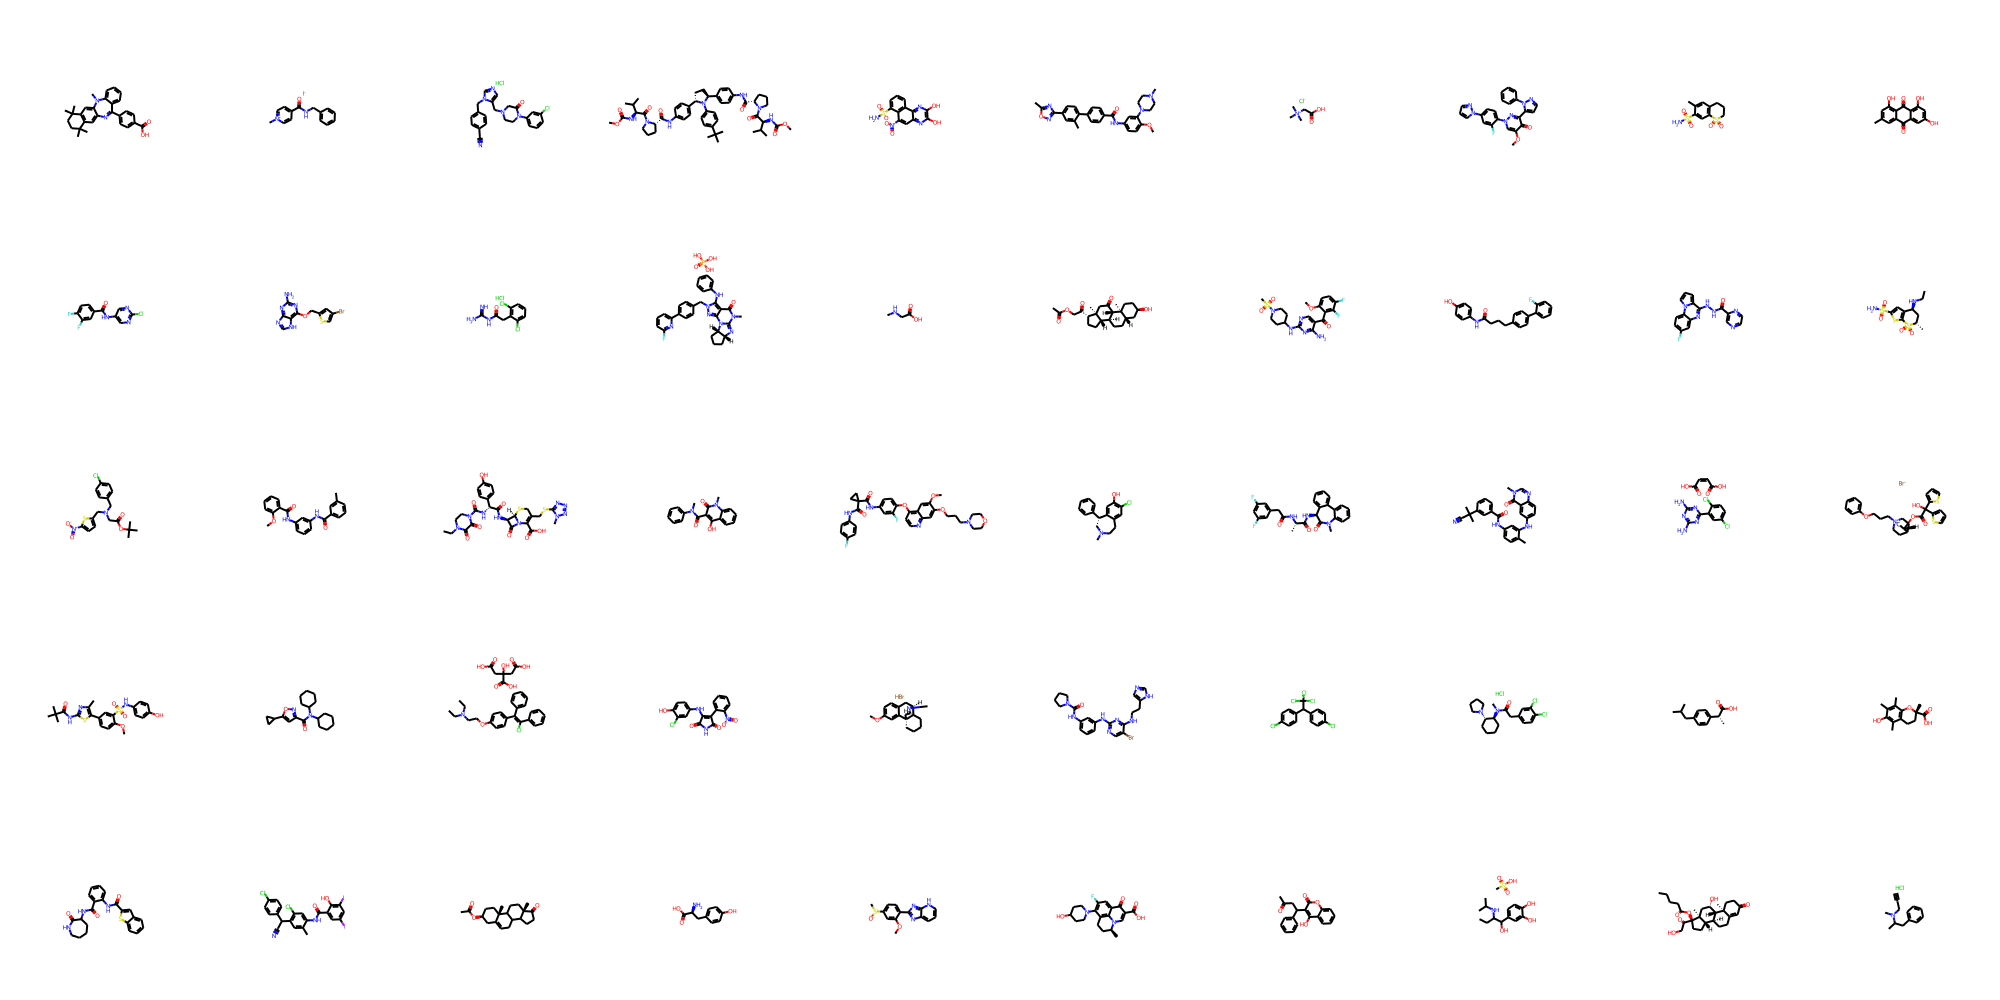

In [4459]:
smiles_list = [

'CN1c2cc3c(cc2N=C(c2ccc(C(=O)O)cc2)c2ccccc21)C(C)(C)CCC3(C)C',
'C[n+]1ccc(C(=O)NCc2ccccc2)cc1.[I-]',
'Cl.N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1',
'COC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)Nc1ccc([C@@H]2CC[C@@H](c3ccc(NC(=O)[C@@H]4CCCN4C(=O)[C@@H](NC(=O)OC)C(C)C)cc3)N2c2ccc(C(C)(C)C)cc2)cc1)C(C)C',
'NS(=O)(=O)c1cccc2c1c([N+](=O)[O-])cc1nc(O)c(O)nc12',
'COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc2)cc1N1CCN(C)CC1',
'C[N+](C)(C)CC(=O)O.[Cl-]',
'COc1cn(-c2ccc(-n3cccn3)cc2F)nc(-c2ccnn2-c2ccccc2)c1=O',
'Cc1cc2c(cc1S(N)(=O)=O)S(=O)(=O)CCC2',
'Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O',
'O=C(Nc1cnc(Cl)nc1)c1ccc(F)c(F)c1',
'Nc1nc(OCc2cc(Br)cs2)c2[nH]cnc2n1',
'Cl.N=C(N)NC(=O)Cc1c(Cl)cccc1Cl',
'CN1C(=O)c2c(nn(Cc3ccc(-c4cccc(F)n4)cc3)c2Nc2ccccc2)N2C1=N[C@@H]1CCC[C@@H]12.O=P(O)(O)O',
'CNCC(=O)O',
'CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC[C@]4(C)[C@H]3C(=O)C[C@]12C',
'COc1ccc(F)c(F)c1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N',
'O=C(CCCc1ccc(-c2ccccc2F)cc1)Nc1ccc(O)cc1',
'O=C(NNc1nc2cc(F)ccc2n2cccc12)c1cnccn1',
'CCN[C@H]1C[C@H](C)S(=O)(=O)c2sc(S(N)(=O)=O)cc21',
'CC(C)(C)OC(=O)CN(Cc1ccc(Cl)cc1)Cc1ccc([N+](=O)[O-])s1',
'COc1ccccc1C(=O)Nc1cccc(NC(=O)c2cccc(C)c2)c1',
'CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=O)O)=C(CSc4nnnn4C)CS[C@H]23)c2ccc(O)cc2)C(=O)C1=O',
'CN(C(=O)c1c(O)c2ccccc2n(C)c1=O)c1ccccc1',
'COc1cc2c(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4)cc3F)ccnc2cc1OCCCN1CCOCC1',
'CN1CCc2cc(Cl)c(O)cc2[C@@H](c2ccccc2)C1',
'C[C@H](NC(=O)Cc1cc(F)cc(F)c1)C(=O)N[C@@H]1C(=O)N(C)c2ccccc2-c2ccccc21',
'Cc1ccc(NC(=O)c2cccc(C(C)(C)C#N)c2)cc1Nc1ccc2ncn(C)c(=O)c2c1',
'Nc1nc(N)nc(-c2cc(Cl)ccc2Cl)n1.O=C(O)/C=C\C(=O)O',
'O=C(O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1.[Br-]',
'COc1ccc(-c2sc(NC(=O)C(C)(C)C)nc2C)cc1S(=O)(=O)Nc1ccc(O)cc1',
'O=C(c1cc(C2CC2)on1)N(C1CCCCC1)C1CCCCC1',
'CCN(CC)CCOc1ccc(/C(=C(\Cl)c2ccccc2)c2ccccc2)cc1.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c(Cl)c1',
'Br.COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3',
'O=C(Nc1cccc(Nc2ncc(Br)c(NCCc3cnc[nH]3)n2)c1)N1CCCC1',
'Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1',
'CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H]1CCCC[C@@H]1N1CCCC1.Cl',
'CC(C)Cc1ccc([C@@H](C)C(=O)O)cc1',
'Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(C(=O)O)O2',
'O=C(Nc1ccccc1C(=O)NC1CCCCNC1=O)c1cc2ccccc2s1',
'Cc1cc(C(C#N)c2ccc(Cl)cc2)c(Cl)cc1NC(=O)c1cc(I)cc(I)c1O',
'CC(=O)O[C@H]1CC[C@@]2(C)C(=CCC3C4CCC(=O)[C@@]4(C)CCC32)C1',
'N[C@@H](Cc1ccc(O)cc1)C(=O)O',
'COc1cc([S+](C)[O-])ccc1-c1nc2ccc[nH]c-2n1',
'C[C@H]1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23',
'CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O',
'CCC(NC(C)C)C(O)c1ccc(O)c(O)c1.CS(=O)(=O)O',
'CCCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3[C@@H](O)C[C@@]21C',
'C#CCN(C)C(C)Cc1ccccc1.Cl',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



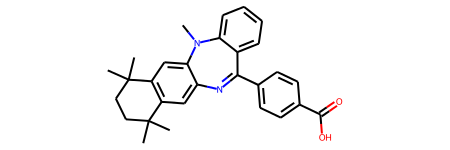

In [4460]:
M1 = mol_list [0]
M1

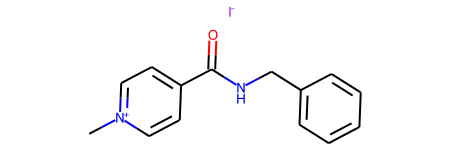

In [4461]:
M2 = mol_list [1]
M2

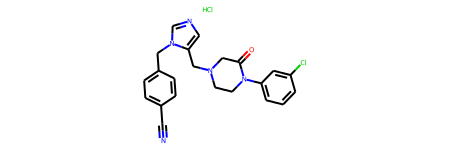

In [4462]:
M3 = mol_list [2]
M3

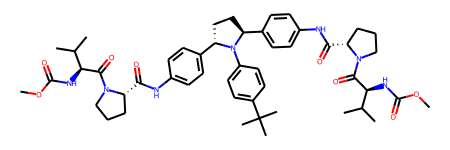

In [4463]:
M4 = mol_list [3]
M4

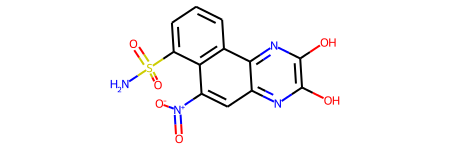

In [4464]:
M5 = mol_list [4]
M5

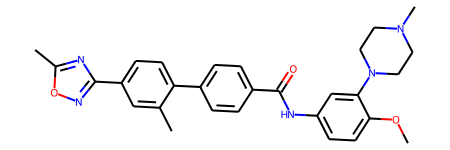

In [4465]:
M6 = mol_list [5]
M6

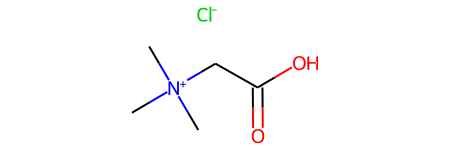

In [4466]:
M7 = mol_list [6]
M7

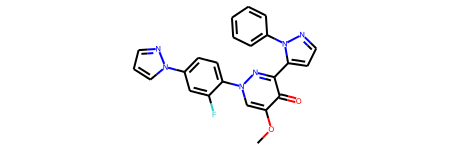

In [4467]:
M8 = mol_list [7]
M8

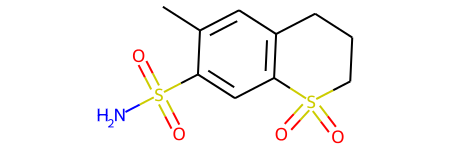

In [4468]:
M9 = mol_list [8]
M9

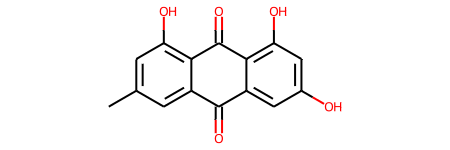

In [4469]:
M10 = mol_list [9]
M10

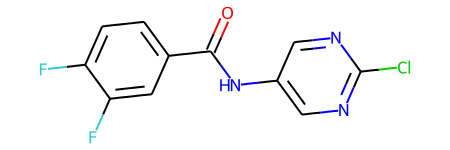

In [4470]:
M11 = mol_list [10]
M11

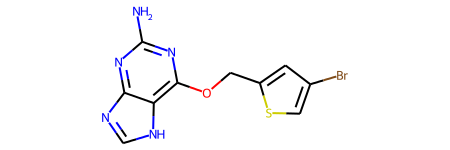

In [4471]:
M12 = mol_list [11]
M12

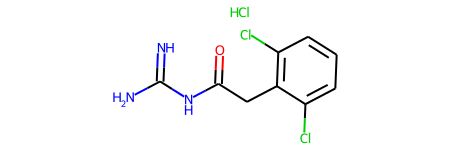

In [4472]:
M13 = mol_list [12]
M13

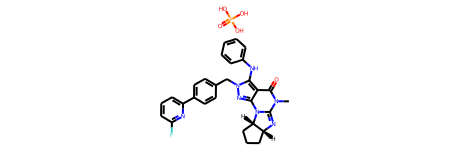

In [4473]:
M14 = mol_list [13]
M14

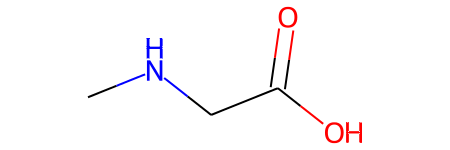

In [4474]:
M15 = mol_list [14]
M15

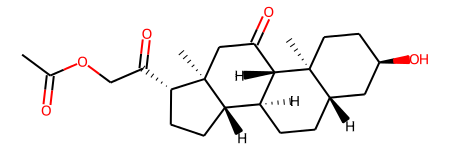

In [4475]:
M16 = mol_list [15]
M16

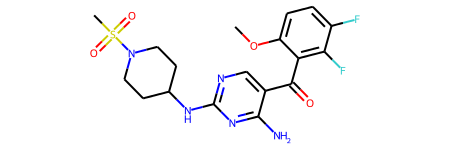

In [4476]:
M17 = mol_list [16]
M17

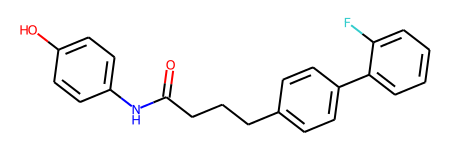

In [4477]:
M18 = mol_list [17]
M18

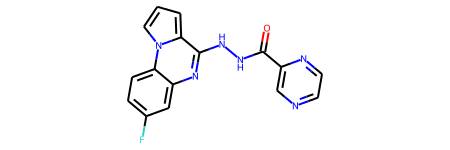

In [4478]:
M19 = mol_list [18]
M19

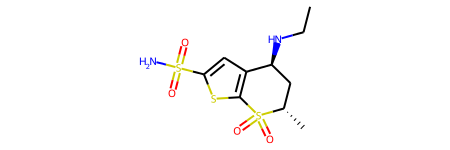

In [4479]:
M20 = mol_list [19]
M20

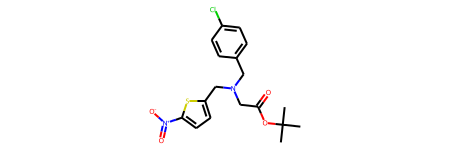

In [4480]:
M21 = mol_list [20]
M21

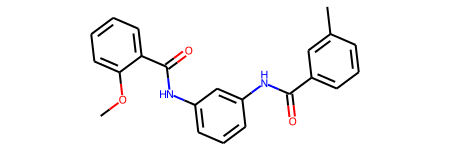

In [4481]:
M22 = mol_list [21]
M22

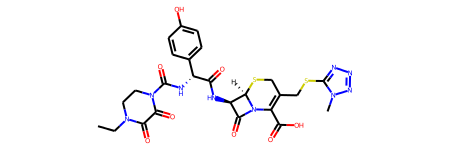

In [4482]:
M23 = mol_list [22]
M23

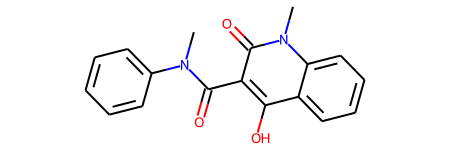

In [4483]:
M24 = mol_list [23]
M24

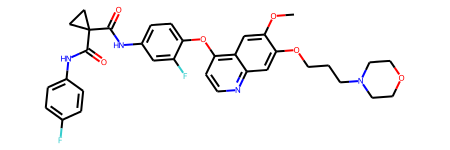

In [4484]:
M25 = mol_list [24]
M25

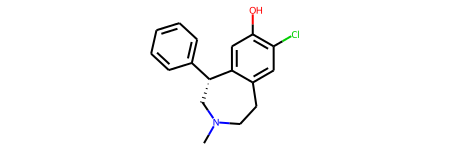

In [4485]:
M26 = mol_list [25]
M26

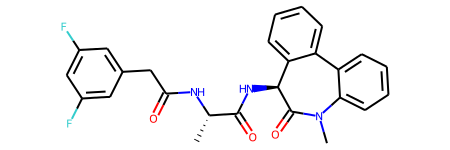

In [4486]:
M27 = mol_list [26]
M27

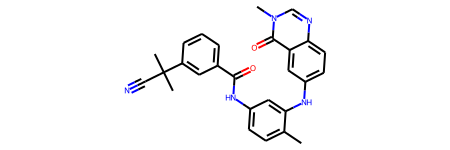

In [4487]:
M28 = mol_list [27]
M28

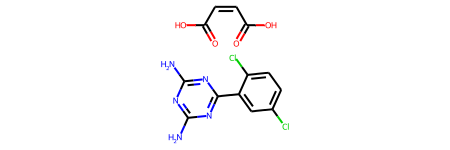

In [4488]:
M29 = mol_list [28]
M29

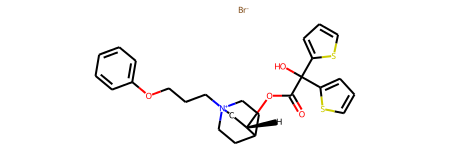

In [4489]:
M30 = mol_list [29]
M30

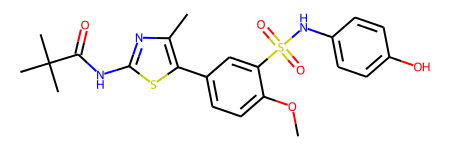

In [4490]:
M31 = mol_list [30]
M31

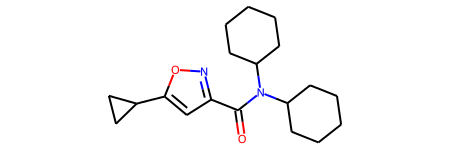

In [4491]:
M32 = mol_list [31]
M32

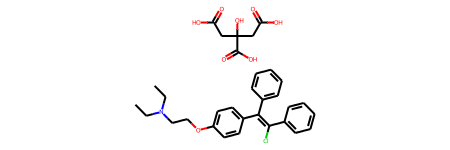

In [4492]:
M33 = mol_list [32]
M33

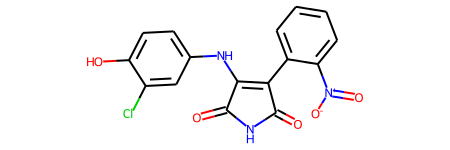

In [4493]:
M34 = mol_list [33]
M34

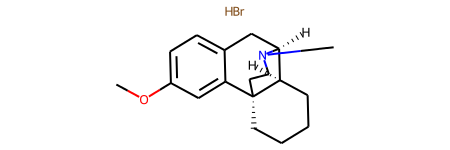

In [4494]:
M35 = mol_list [34]
M35

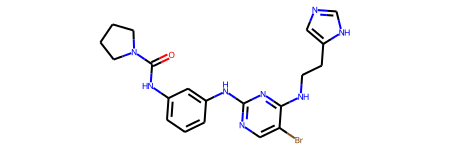

In [4495]:
M36 = mol_list [35]
M36

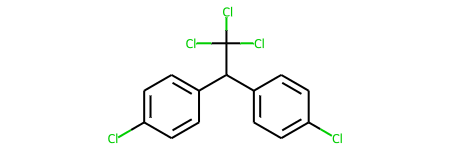

In [4496]:
M37= mol_list [36]
M37

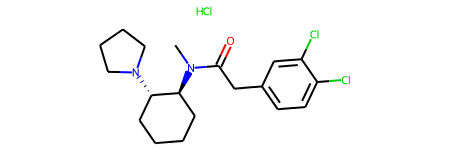

In [4497]:
M38= mol_list [37]
M38

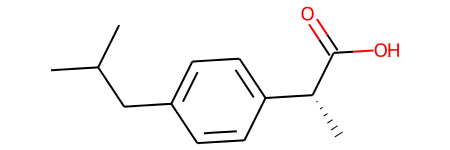

In [4498]:
M39= mol_list [38]
M39

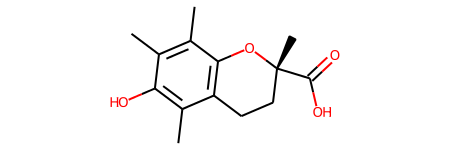

In [4499]:
M40= mol_list [39]
M40

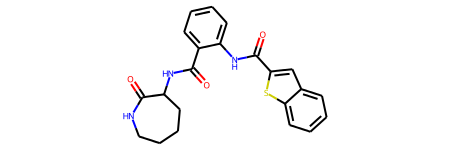

In [4500]:
M41= mol_list [40]
M41

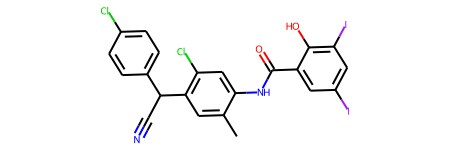

In [4501]:
M42= mol_list [41]
M42

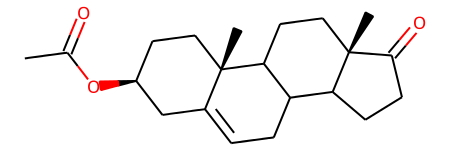

In [4502]:
M43= mol_list [42]
M43

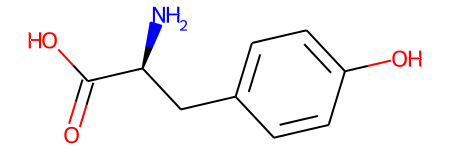

In [4503]:
M44= mol_list [43]
M44

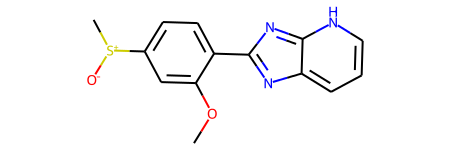

In [4504]:
M45= mol_list [44]
M45

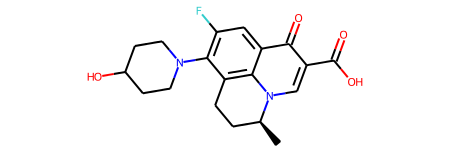

In [4505]:
M46= mol_list [45]
M46

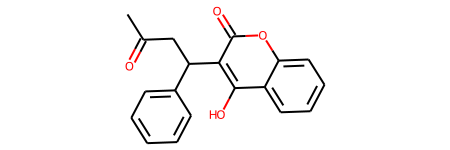

In [4506]:
M47= mol_list [46]
M47

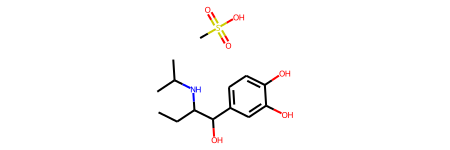

In [4507]:
M48= mol_list [47]
M48

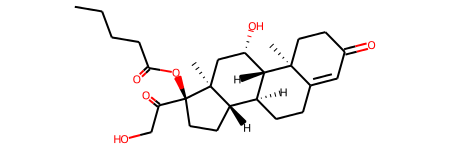

In [4508]:
M49= mol_list [48]
M49

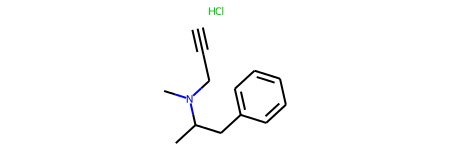

In [4509]:
M50= mol_list [49]
M50

In [4510]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 36,
 42,
 64,
 106,
 109,
 114,
 121,
 136,
 138,
 175,
 250,
 271,
 352,
 353,
 356,
 361,
 378,
 389,
 431,
 440,
 447,
 456,
 547,
 612,
 623,
 650,
 673,
 718,
 724,
 726,
 786,
 807,
 849,
 857,
 875,
 892,
 893,
 896,
 915,
 926,
 927,
 935,
 953,
 956,
 984,
 987,
 1008]

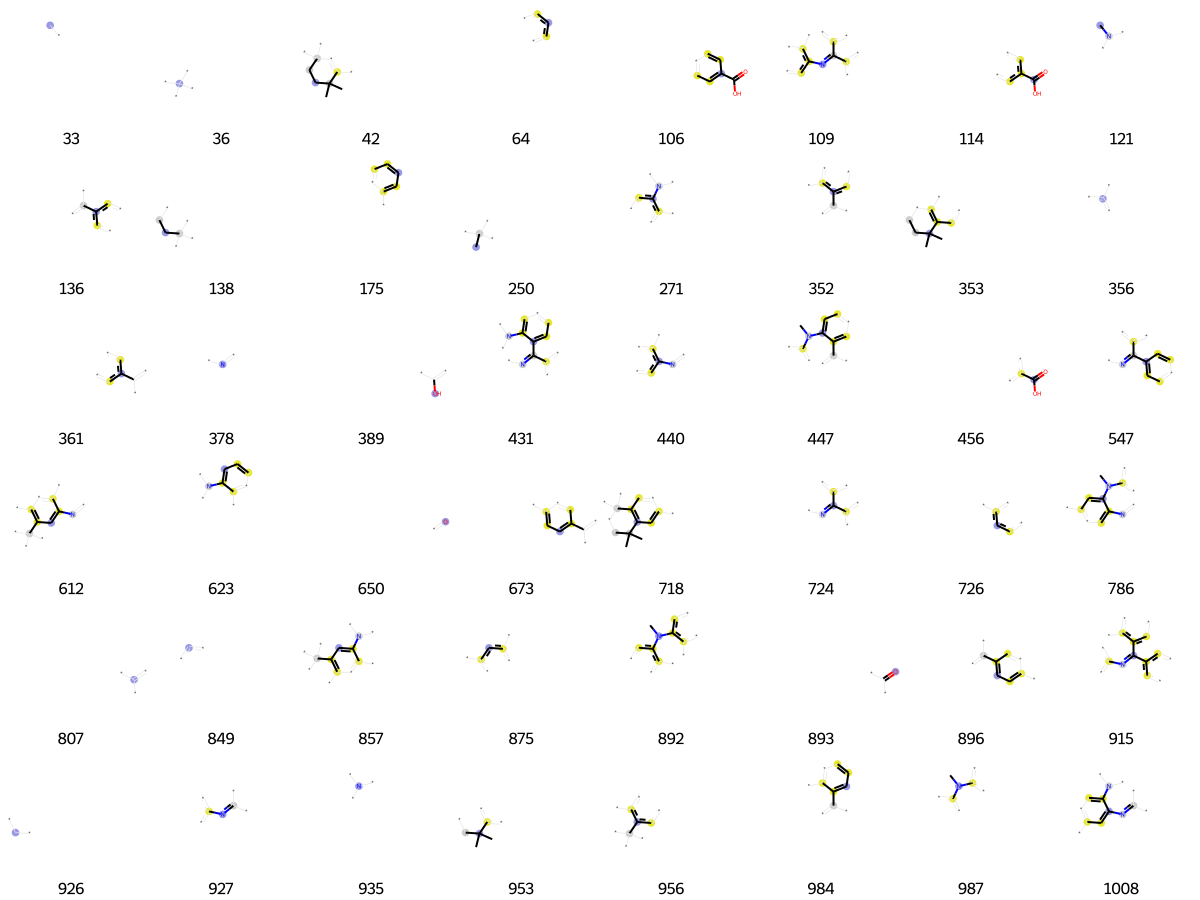

In [4511]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [4512]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 42,
 64,
 80,
 128,
 175,
 197,
 255,
 263,
 265,
 297,
 356,
 361,
 389,
 463,
 486,
 549,
 638,
 641,
 650,
 673,
 691,
 726,
 730,
 787,
 807,
 813,
 816,
 849,
 893,
 1003]

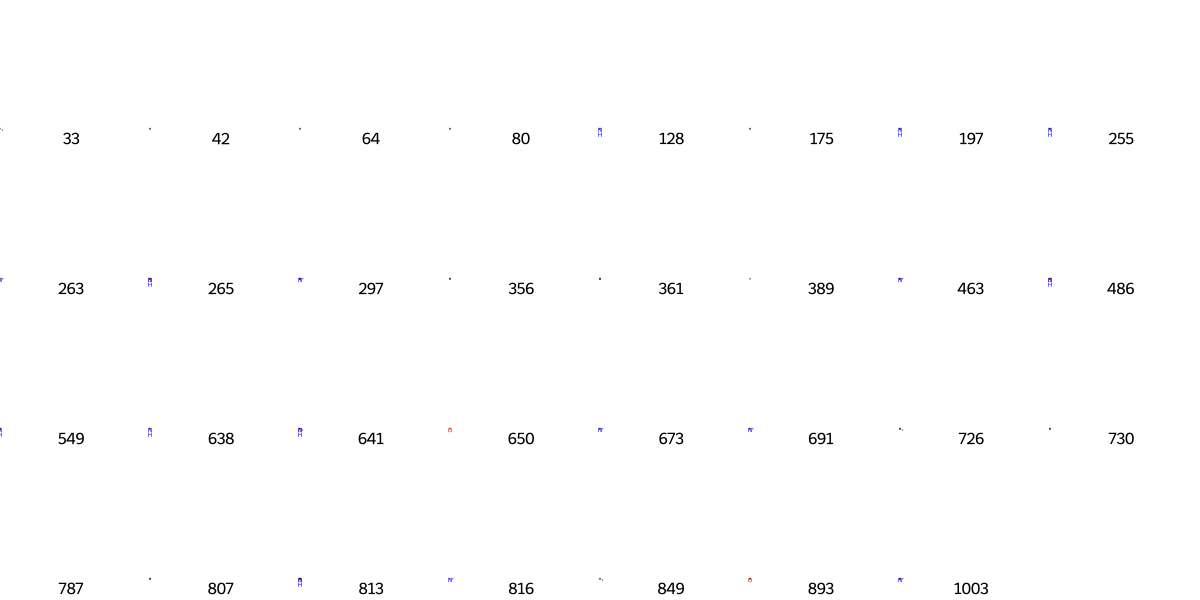

In [4513]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [4514]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 12,
 15,
 25,
 34,
 64,
 74,
 78,
 80,
 102,
 112,
 165,
 203,
 216,
 305,
 310,
 314,
 356,
 360,
 378,
 391,
 431,
 433,
 449,
 455,
 456,
 499,
 511,
 514,
 526,
 542,
 561,
 579,
 592,
 617,
 650,
 659,
 674,
 710,
 726,
 730,
 741,
 767,
 790,
 798,
 801,
 811,
 849,
 875,
 922,
 926,
 930,
 932,
 935,
 952]

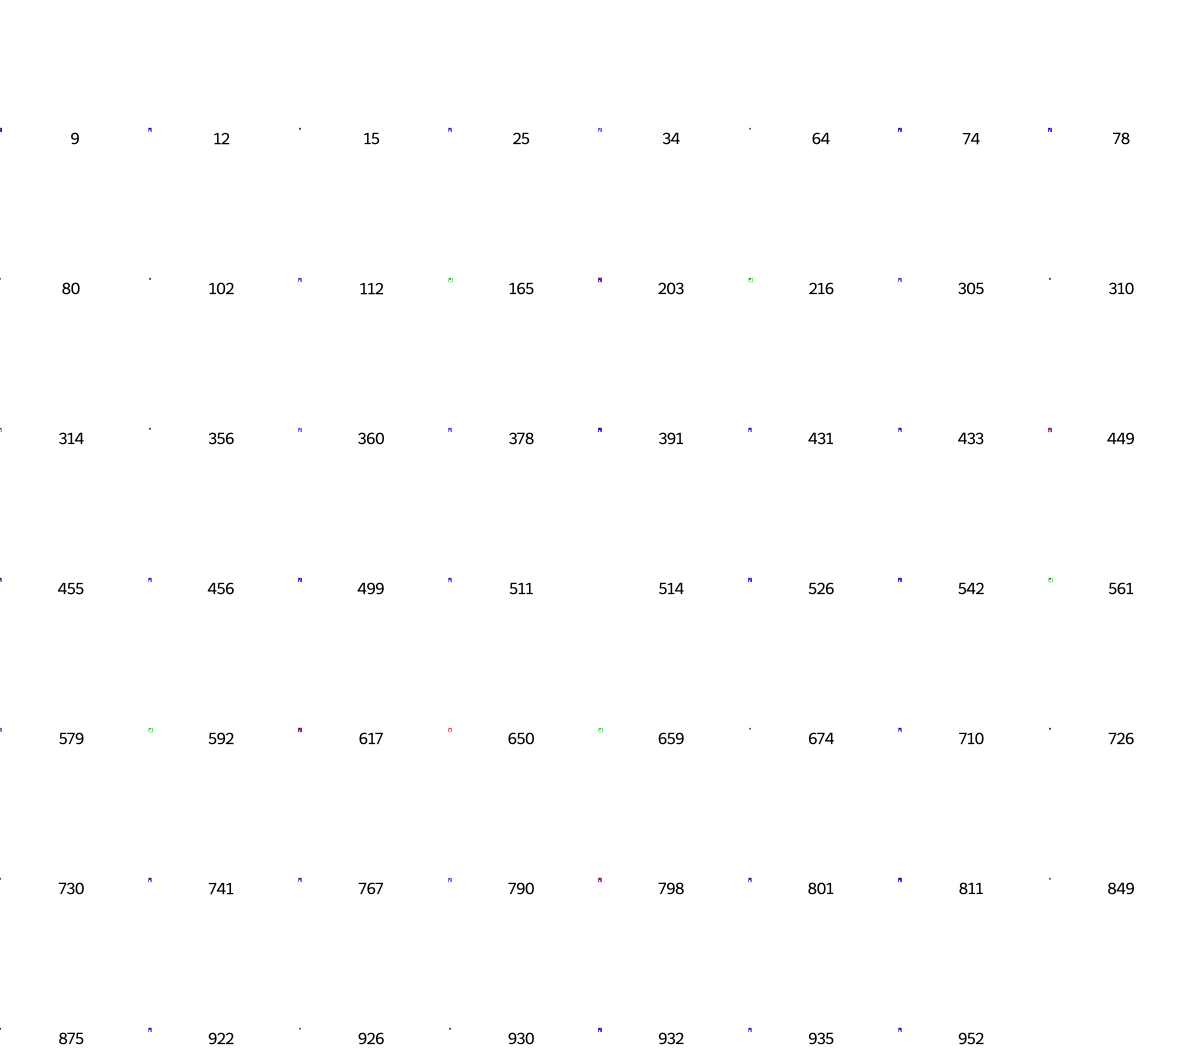

In [4515]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [4516]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 4,
 12,
 16,
 33,
 53,
 72,
 94,
 108,
 114,
 117,
 126,
 128,
 191,
 193,
 233,
 242,
 255,
 263,
 283,
 288,
 301,
 315,
 353,
 354,
 356,
 381,
 392,
 393,
 446,
 447,
 456,
 488,
 507,
 510,
 531,
 532,
 571,
 624,
 641,
 650,
 653,
 668,
 689,
 695,
 726,
 734,
 749,
 779,
 792,
 801,
 807,
 841,
 843,
 849,
 893,
 926,
 935,
 1018,
 1019]

In [4517]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[15,
 64,
 73,
 87,
 93,
 106,
 115,
 147,
 171,
 333,
 350,
 354,
 356,
 378,
 392,
 431,
 438,
 452,
 544,
 549,
 578,
 583,
 650,
 691,
 700,
 709,
 715,
 716,
 726,
 753,
 807,
 831,
 833,
 838,
 849,
 870,
 875,
 915,
 939,
 960,
 992]

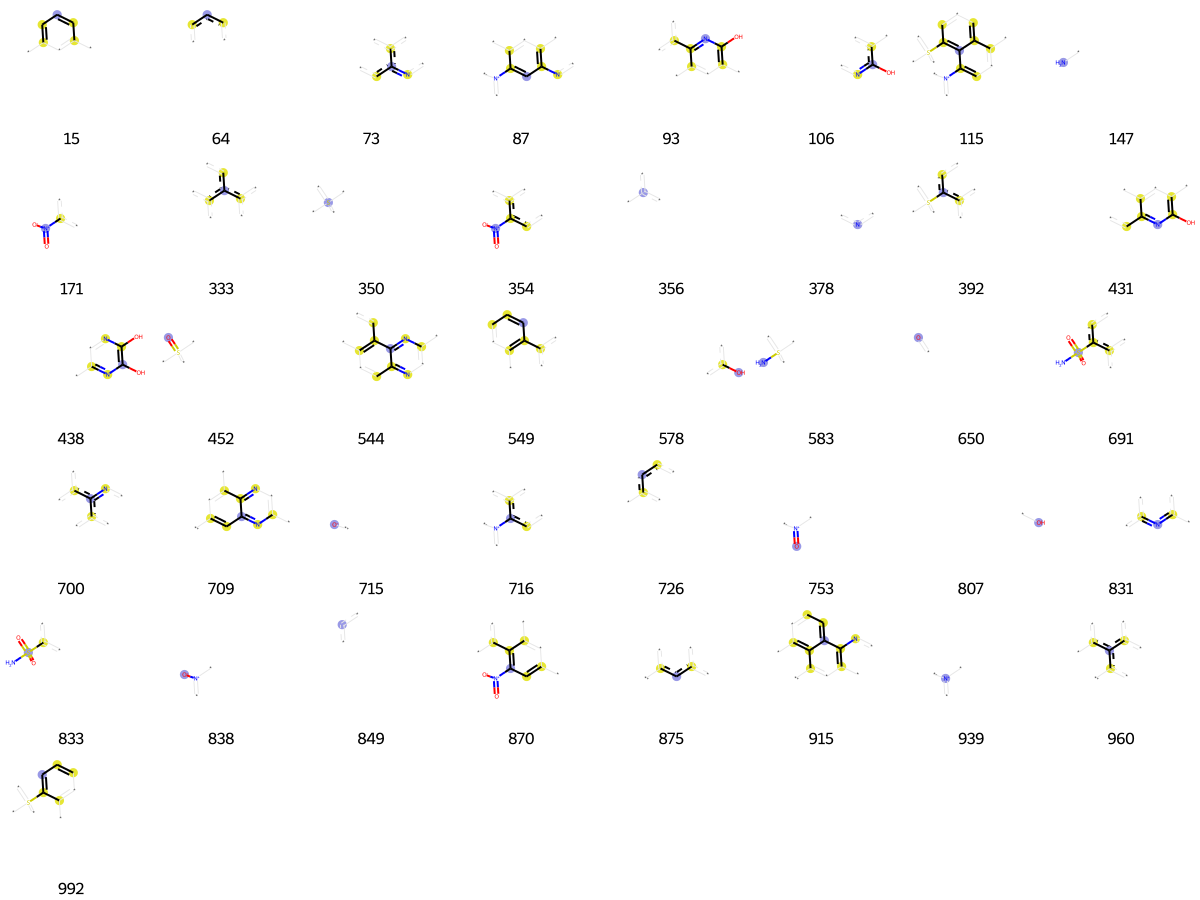

In [4518]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [4519]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[14,
 33,
 94,
 121,
 128,
 136,
 138,
 184,
 191,
 207,
 212,
 221,
 222,
 231,
 248,
 249,
 256,
 271,
 352,
 356,
 361,
 367,
 378,
 407,
 456,
 484,
 486,
 508,
 512,
 518,
 572,
 641,
 650,
 653,
 656,
 673,
 680,
 695,
 698,
 726,
 771,
 792,
 807,
 828,
 831,
 841,
 843,
 849,
 852,
 875,
 886,
 893,
 896,
 900,
 915,
 926,
 935,
 946,
 954,
 989,
 1002]

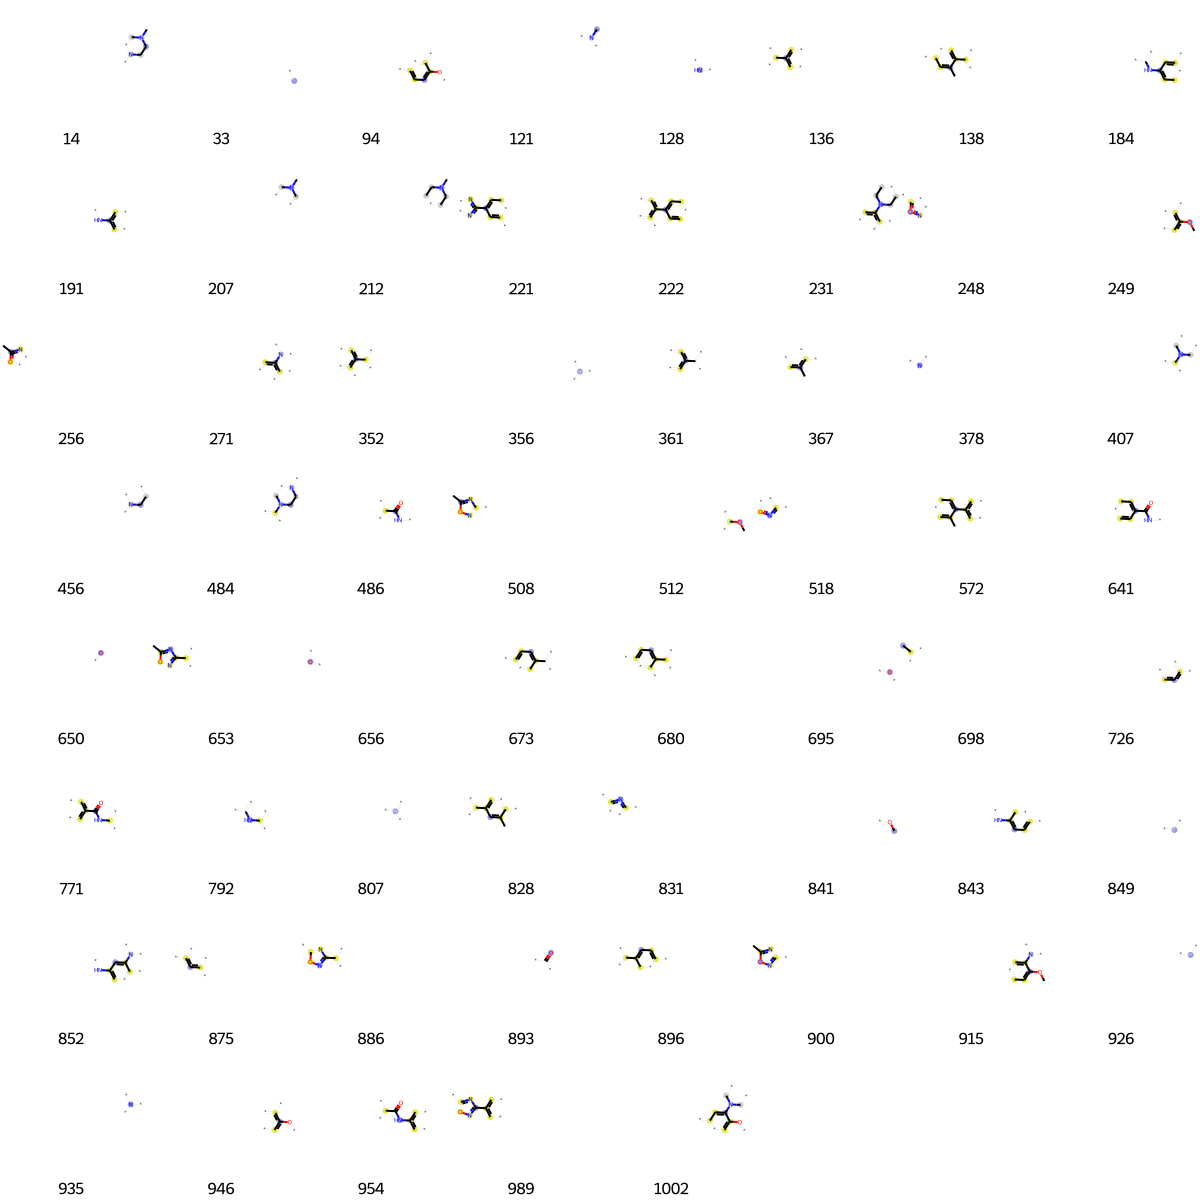

In [4520]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [4521]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33, 80, 256, 319, 378, 389, 414, 522, 562, 628, 650, 713, 807, 842, 893]

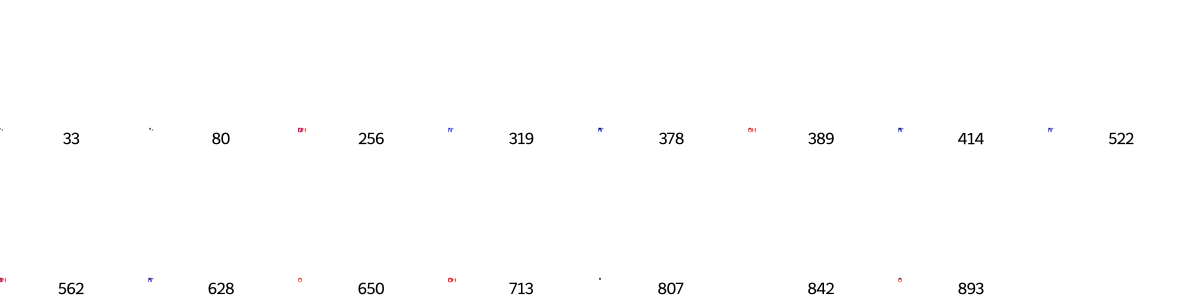

In [4522]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [4523]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[25,
 33,
 43,
 64,
 75,
 77,
 89,
 90,
 164,
 175,
 233,
 249,
 271,
 314,
 323,
 356,
 378,
 389,
 391,
 398,
 416,
 431,
 449,
 462,
 464,
 506,
 512,
 515,
 525,
 540,
 552,
 650,
 656,
 661,
 668,
 695,
 699,
 726,
 791,
 801,
 816,
 828,
 841,
 842,
 849,
 853,
 872,
 875,
 891,
 904,
 932,
 935,
 936,
 946,
 996]

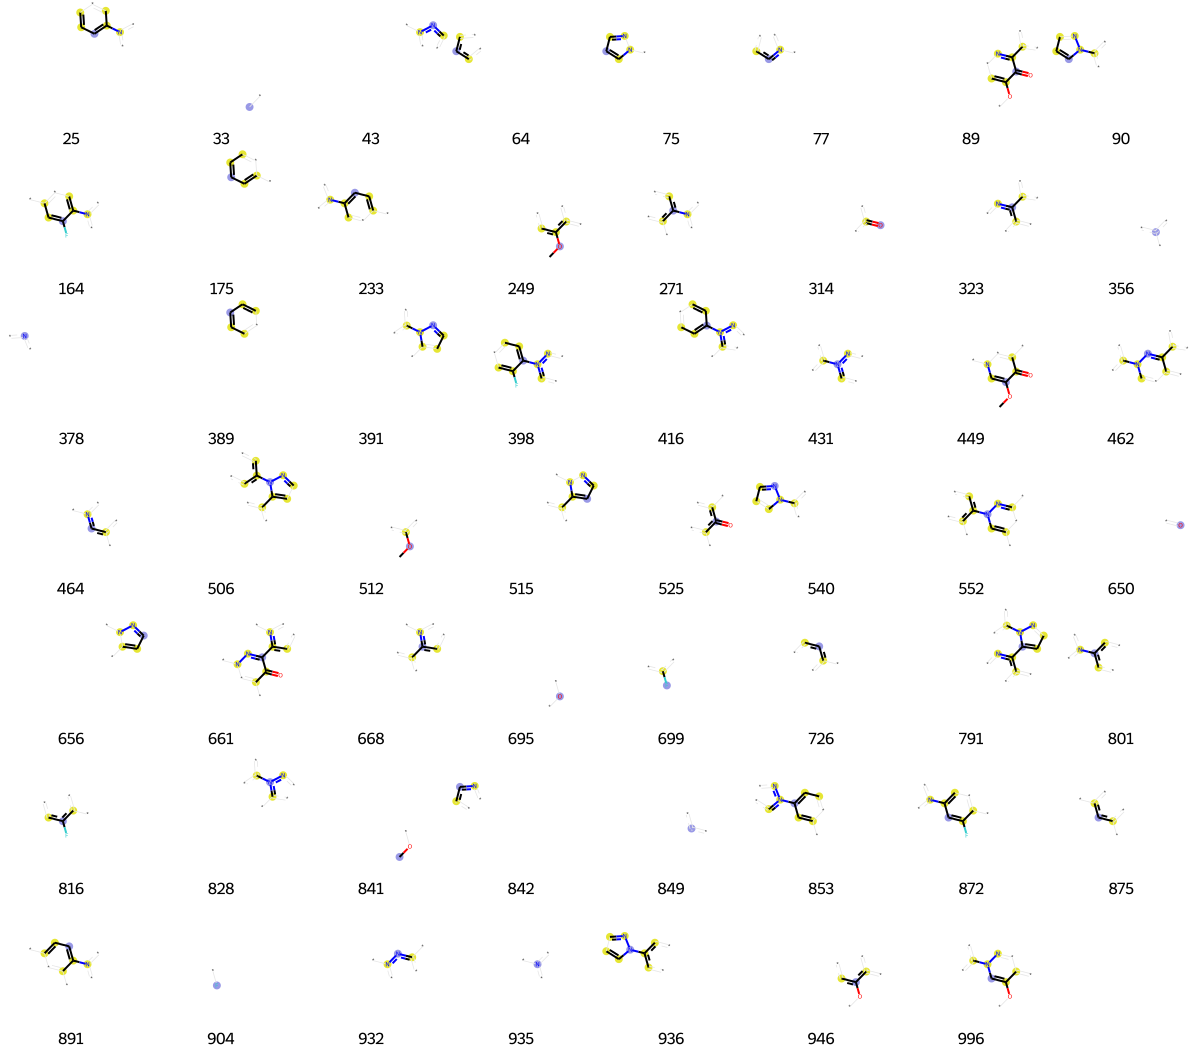

In [4524]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [4525]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[4,
 23,
 33,
 147,
 191,
 207,
 212,
 226,
 252,
 350,
 356,
 367,
 392,
 397,
 439,
 452,
 469,
 483,
 556,
 583,
 614,
 615,
 650,
 691,
 698,
 714,
 833,
 849,
 875,
 912,
 924,
 926,
 1011]

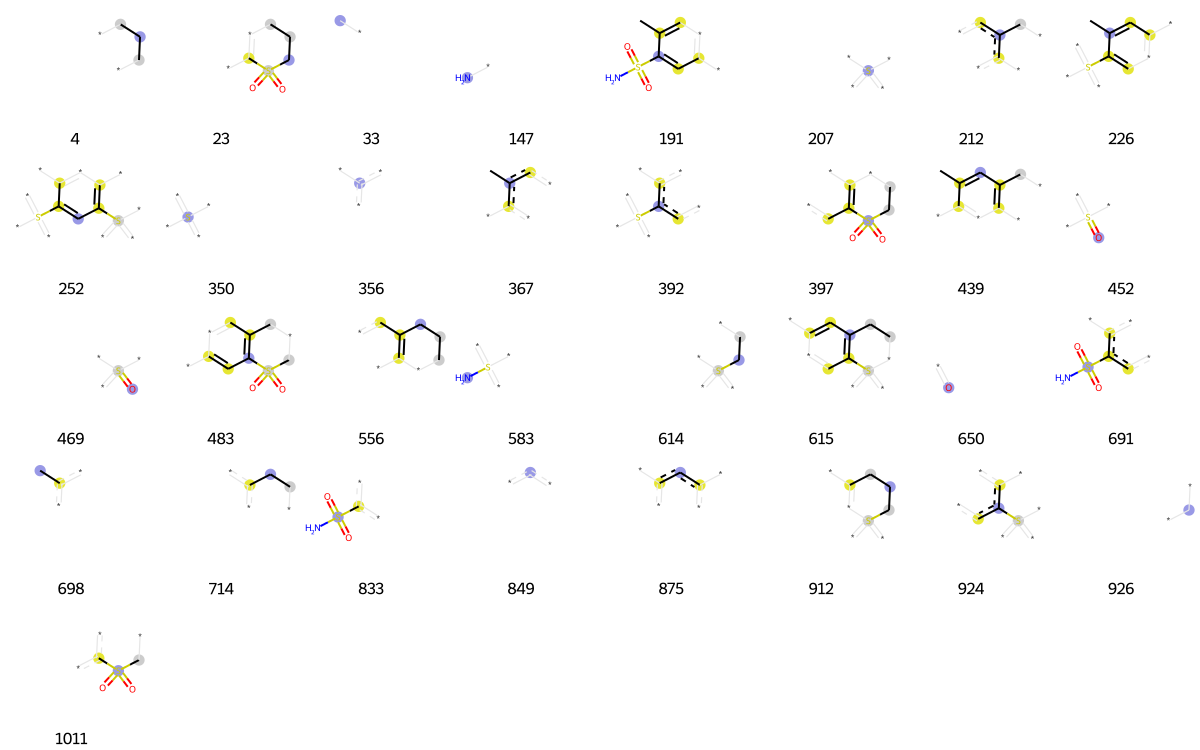

In [4526]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [4527]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 38,
 142,
 157,
 167,
 314,
 352,
 356,
 445,
 452,
 457,
 578,
 583,
 587,
 650,
 675,
 698,
 723,
 745,
 787,
 799,
 807,
 849,
 875,
 901,
 929]

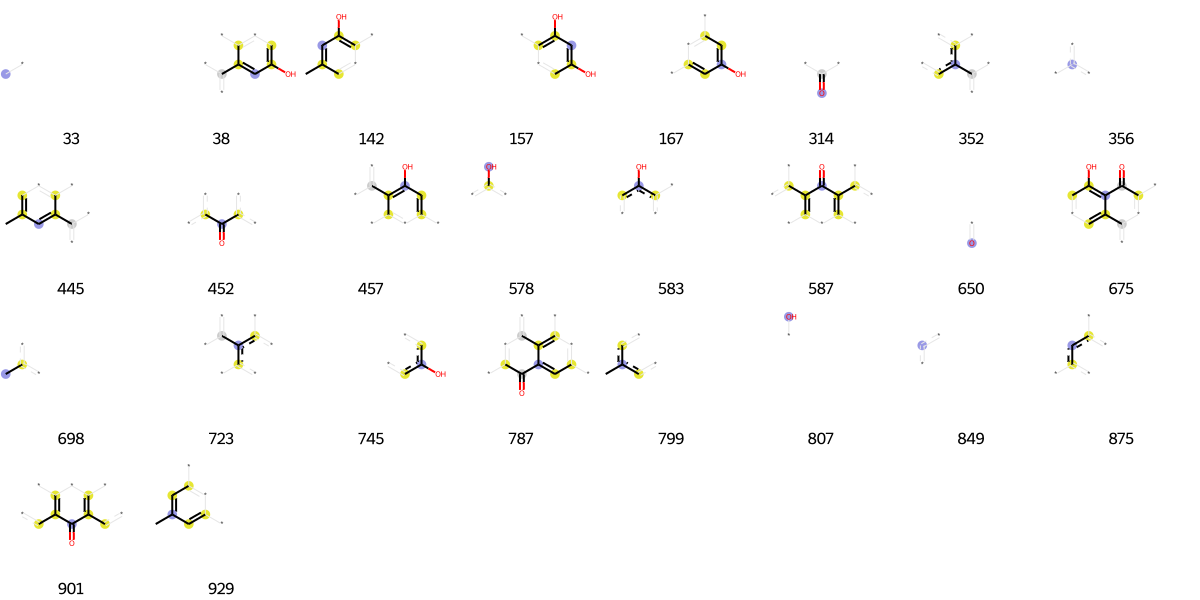

In [4528]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [4529]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[128,
 191,
 216,
 235,
 313,
 336,
 356,
 361,
 378,
 386,
 428,
 486,
 511,
 515,
 526,
 531,
 561,
 650,
 659,
 673,
 699,
 726,
 764,
 771,
 784,
 792,
 807,
 816,
 849,
 875,
 893,
 904,
 954]

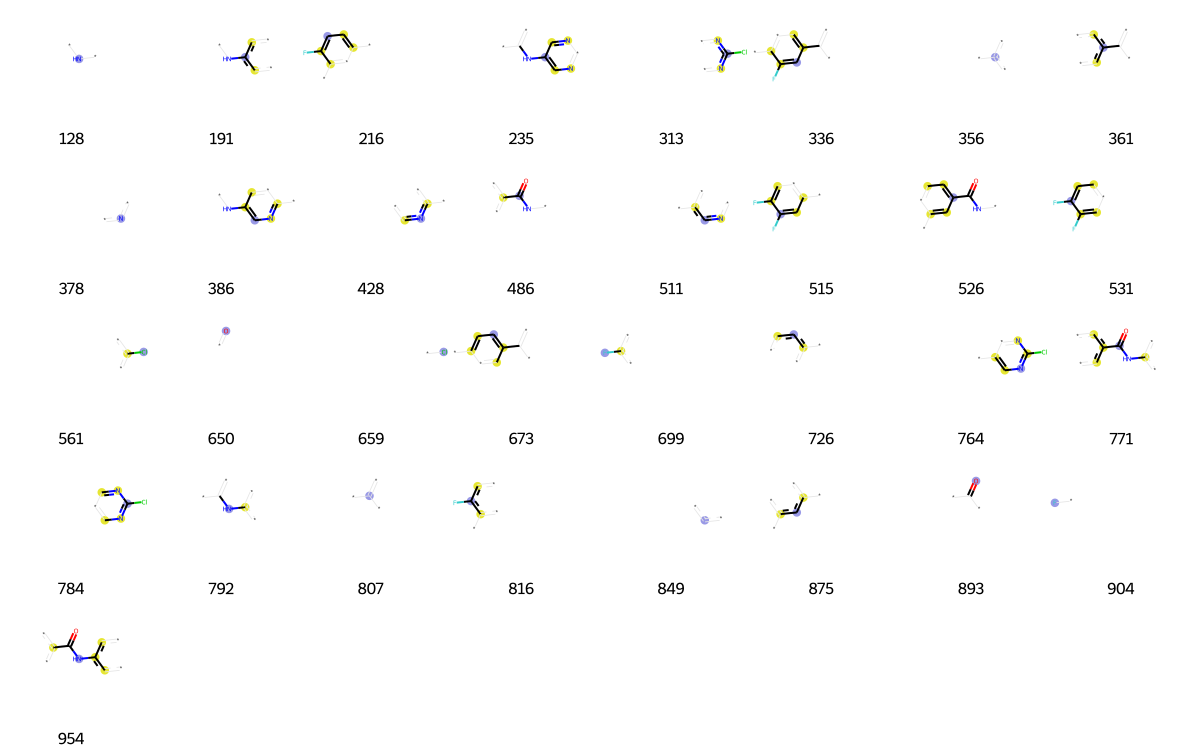

In [4530]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [4531]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[17,
 29,
 80,
 90,
 124,
 147,
 165,
 191,
 216,
 248,
 356,
 377,
 378,
 401,
 409,
 428,
 433,
 506,
 543,
 552,
 563,
 600,
 607,
 637,
 656,
 675,
 688,
 695,
 713,
 728,
 745,
 772,
 806,
 831,
 834,
 849,
 875,
 909,
 987,
 988]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


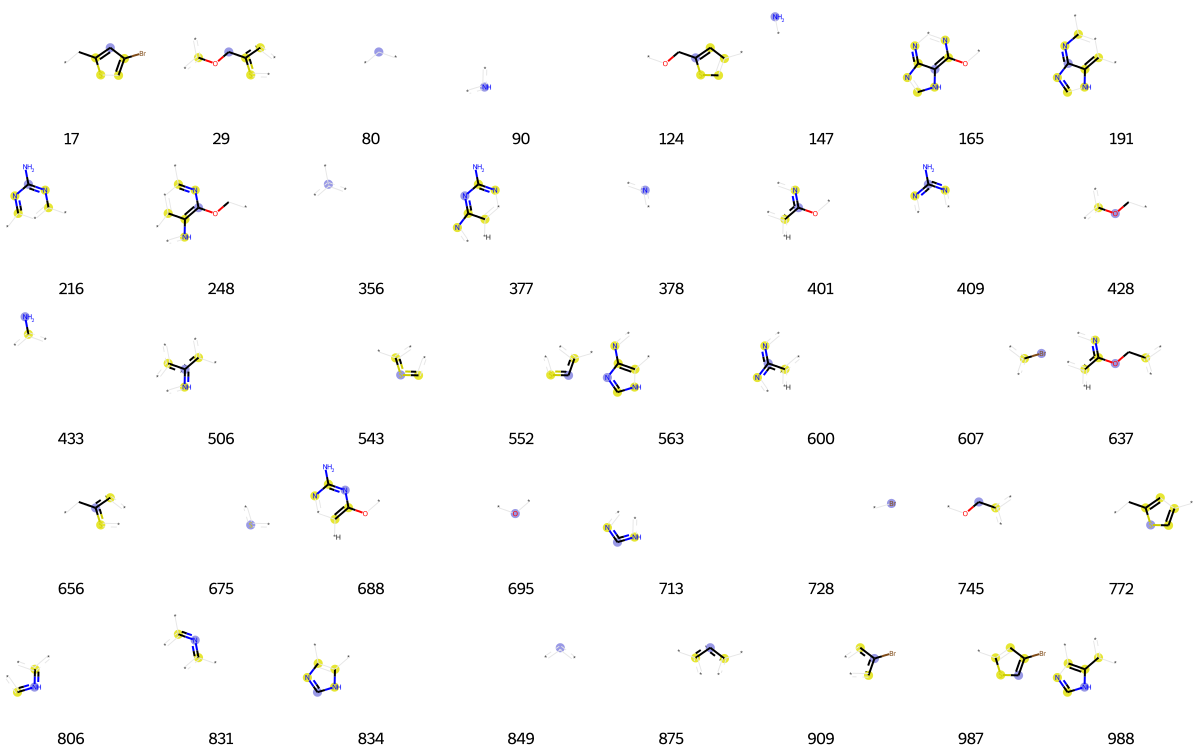

In [4532]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [4533]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 41,
 64,
 80,
 95,
 128,
 140,
 147,
 167,
 246,
 325,
 356,
 366,
 427,
 434,
 514,
 561,
 623,
 650,
 659,
 684,
 726,
 807,
 849,
 893,
 960,
 974,
 996,
 1010]

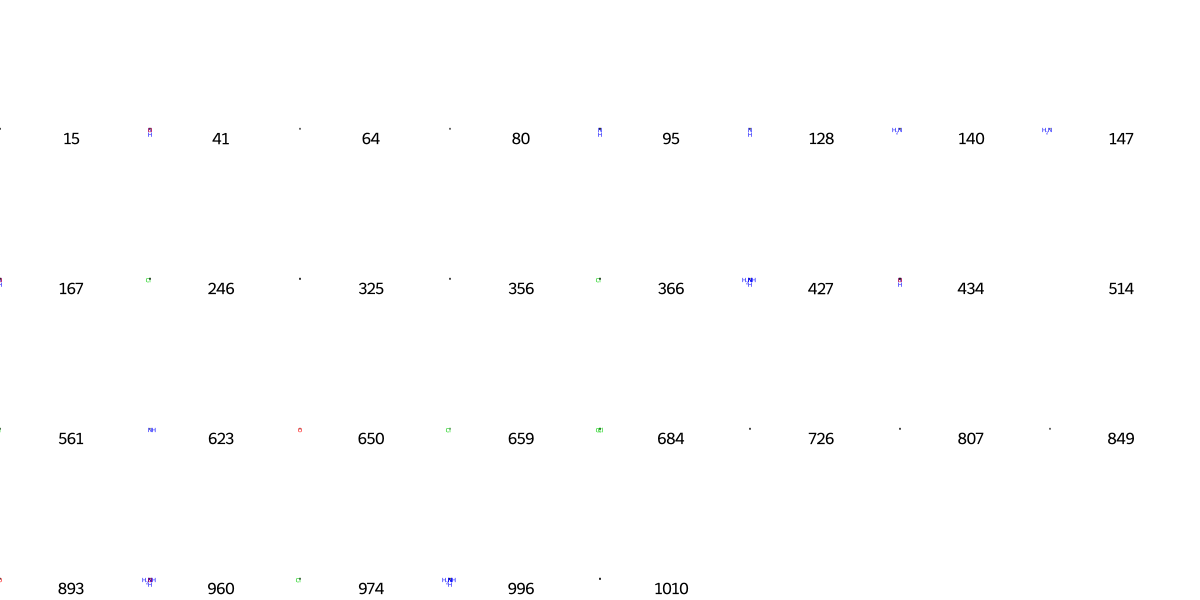

In [4534]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [4535]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[4,
 15,
 33,
 39,
 46,
 64,
 80,
 96,
 106,
 121,
 128,
 130,
 136,
 148,
 151,
 158,
 175,
 191,
 192,
 213,
 301,
 310,
 314,
 332,
 341,
 356,
 378,
 389,
 393,
 486,
 491,
 500,
 532,
 559,
 566,
 580,
 612,
 650,
 659,
 665,
 699,
 703,
 711,
 723,
 726,
 730,
 741,
 748,
 782,
 787,
 807,
 814,
 827,
 831,
 849,
 869,
 870,
 879,
 894,
 896,
 898,
 904,
 926,
 932,
 935,
 937,
 947,
 969,
 980,
 987,
 1012,
 1019]

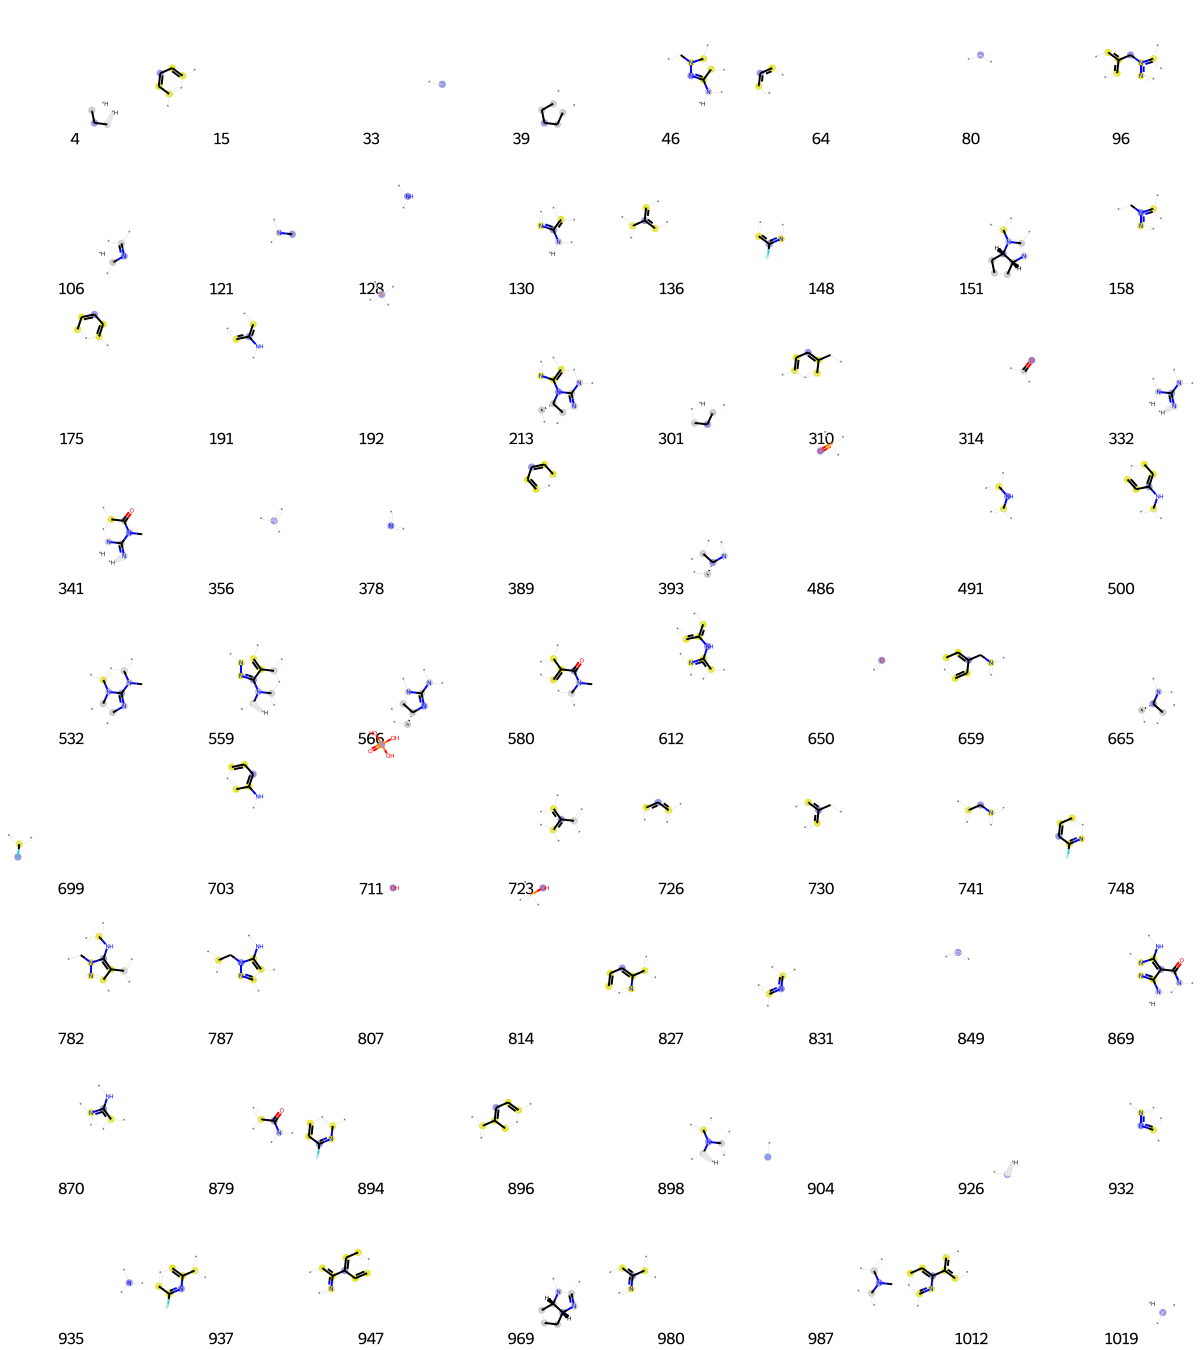

In [4536]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [4537]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33, 80, 128, 389, 390, 406, 416, 586, 650, 713, 807, 893, 971, 1021]

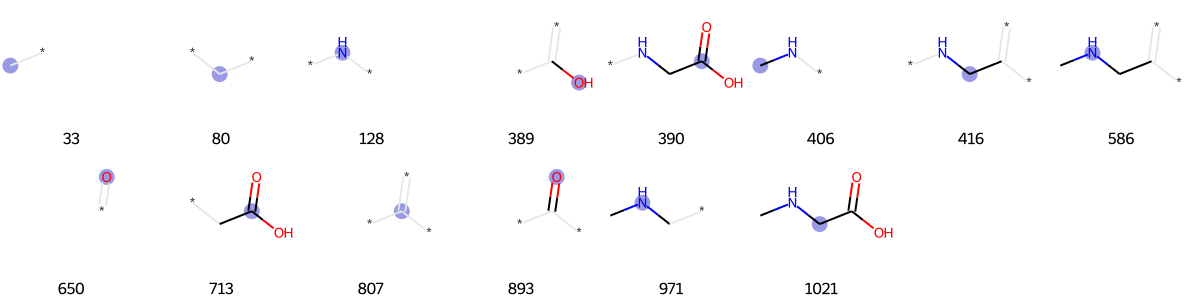

In [4538]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [4539]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[11,
 26,
 33,
 36,
 80,
 87,
 105,
 120,
 138,
 147,
 151,
 157,
 233,
 250,
 268,
 279,
 287,
 301,
 314,
 324,
 328,
 356,
 370,
 434,
 453,
 493,
 494,
 500,
 519,
 522,
 528,
 559,
 562,
 583,
 590,
 622,
 650,
 695,
 775,
 778,
 807,
 846,
 893,
 926,
 927,
 940,
 956,
 980,
 992,
 1017,
 1019]

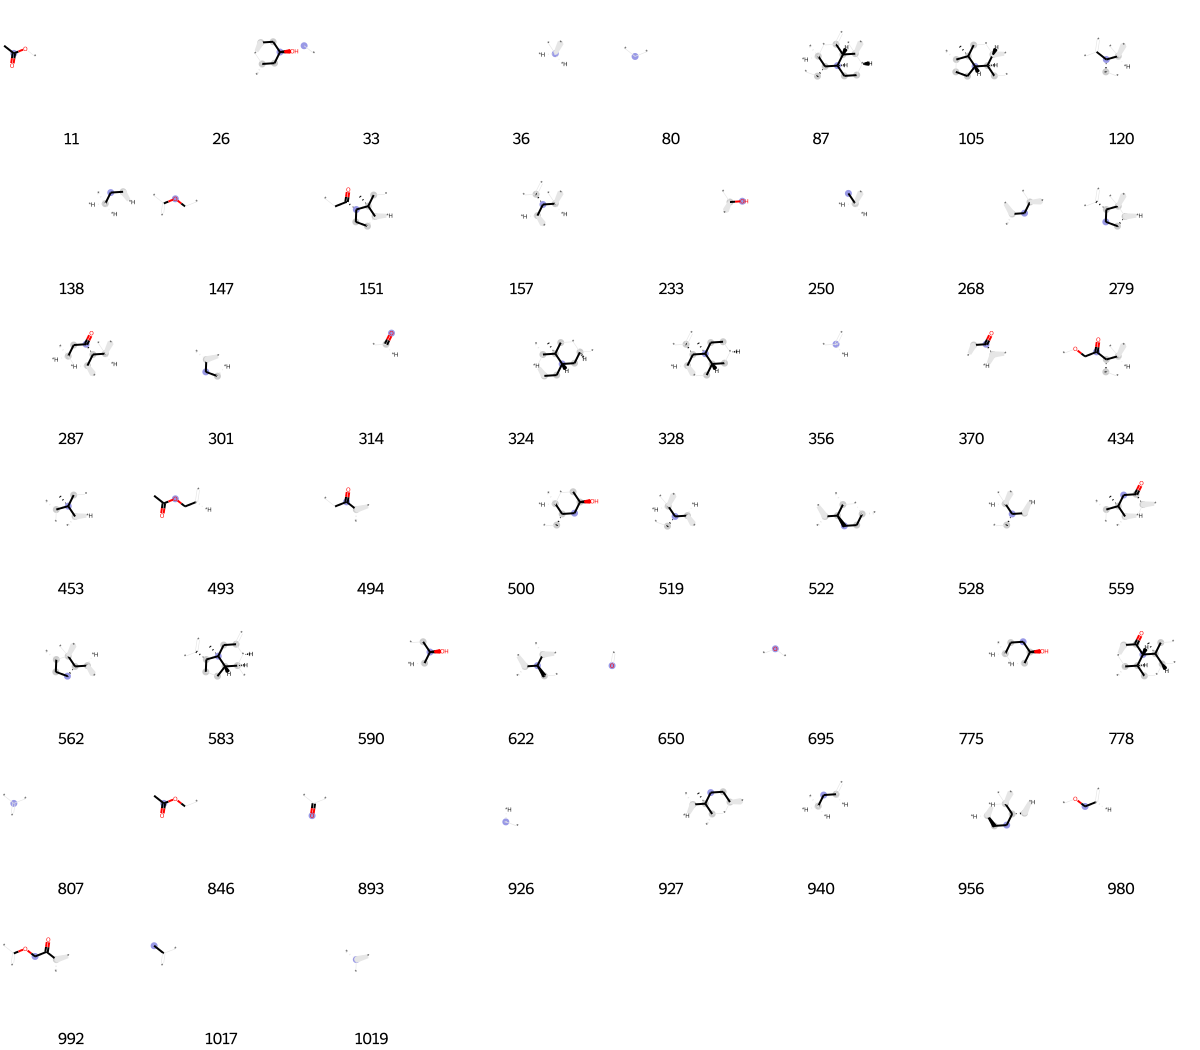

In [4540]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [4541]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[9,
 33,
 94,
 119,
 128,
 138,
 144,
 147,
 154,
 182,
 211,
 216,
 249,
 261,
 301,
 350,
 356,
 378,
 396,
 421,
 428,
 433,
 435,
 452,
 456,
 511,
 512,
 544,
 551,
 558,
 565,
 585,
 586,
 598,
 610,
 650,
 692,
 695,
 699,
 726,
 743,
 807,
 816,
 825,
 831,
 841,
 849,
 879,
 893,
 904,
 926,
 935,
 940,
 946,
 966,
 967,
 969,
 1019]

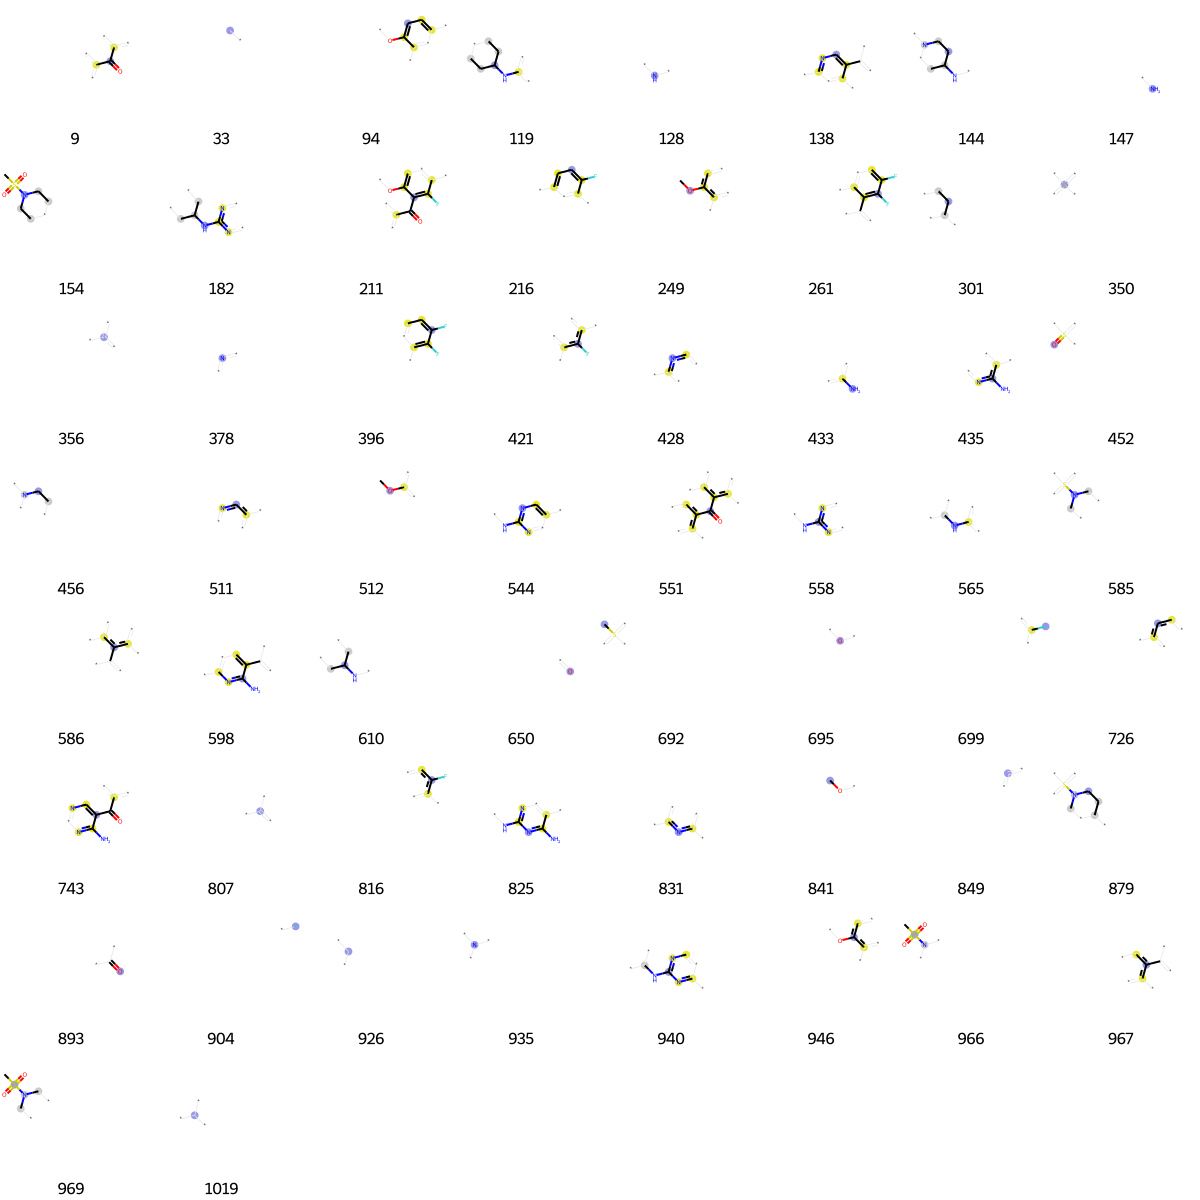

In [4542]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [4543]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[8,
 21,
 41,
 53,
 64,
 65,
 80,
 128,
 136,
 175,
 191,
 219,
 222,
 289,
 310,
 352,
 356,
 358,
 451,
 540,
 578,
 650,
 694,
 699,
 717,
 726,
 730,
 745,
 754,
 792,
 807,
 816,
 843,
 849,
 887,
 893,
 896,
 901,
 904,
 978,
 984]

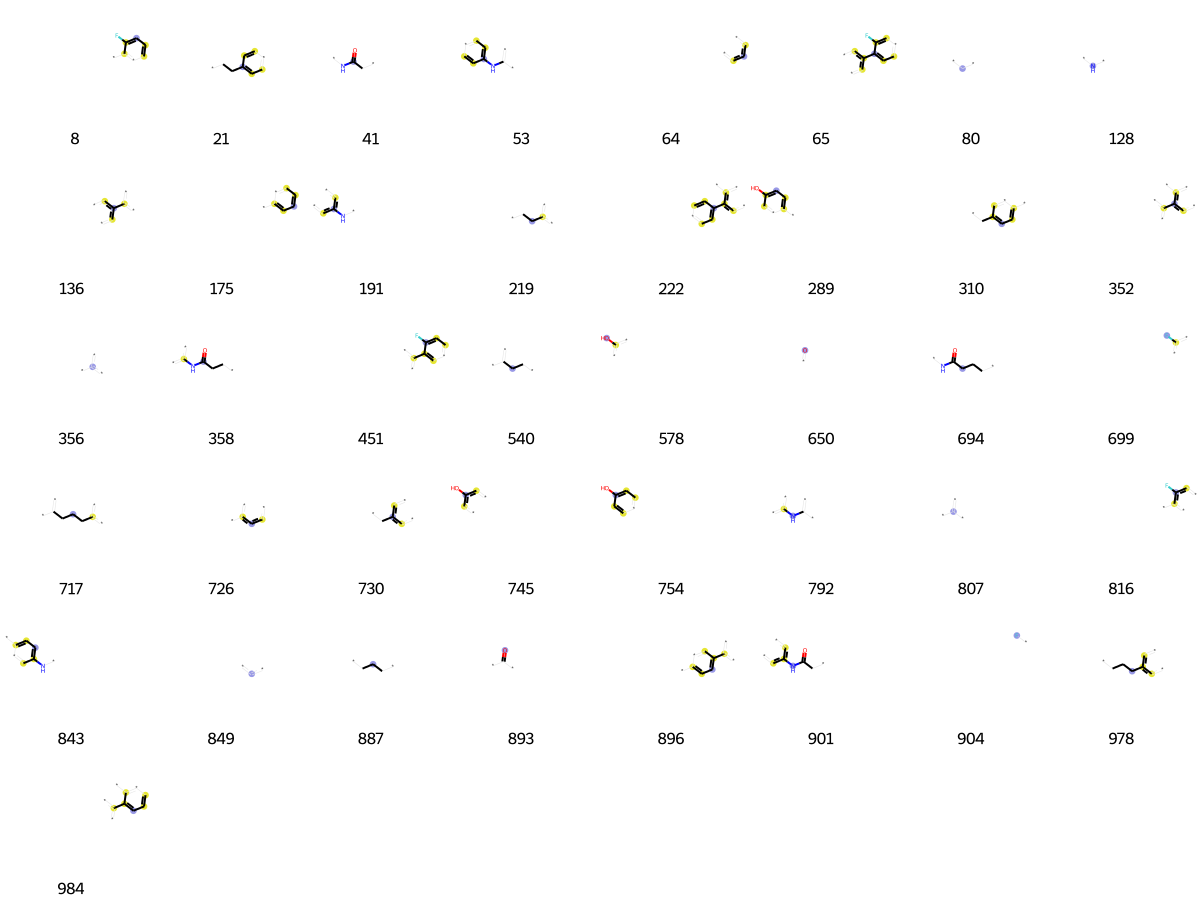

In [4544]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [4545]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[44,
 45,
 47,
 64,
 73,
 77,
 84,
 95,
 101,
 128,
 261,
 318,
 356,
 370,
 378,
 386,
 428,
 463,
 473,
 486,
 511,
 547,
 552,
 562,
 579,
 600,
 646,
 650,
 676,
 684,
 699,
 708,
 726,
 745,
 751,
 768,
 807,
 831,
 842,
 849,
 855,
 875,
 893,
 897,
 904,
 935,
 945,
 965,
 997]

In [4546]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[3,
 33,
 80,
 98,
 128,
 147,
 162,
 207,
 268,
 285,
 294,
 338,
 350,
 356,
 368,
 413,
 452,
 469,
 497,
 545,
 571,
 583,
 596,
 618,
 650,
 659,
 675,
 702,
 722,
 776,
 805,
 833,
 849,
 875,
 926,
 936,
 942,
 976,
 982,
 1019]

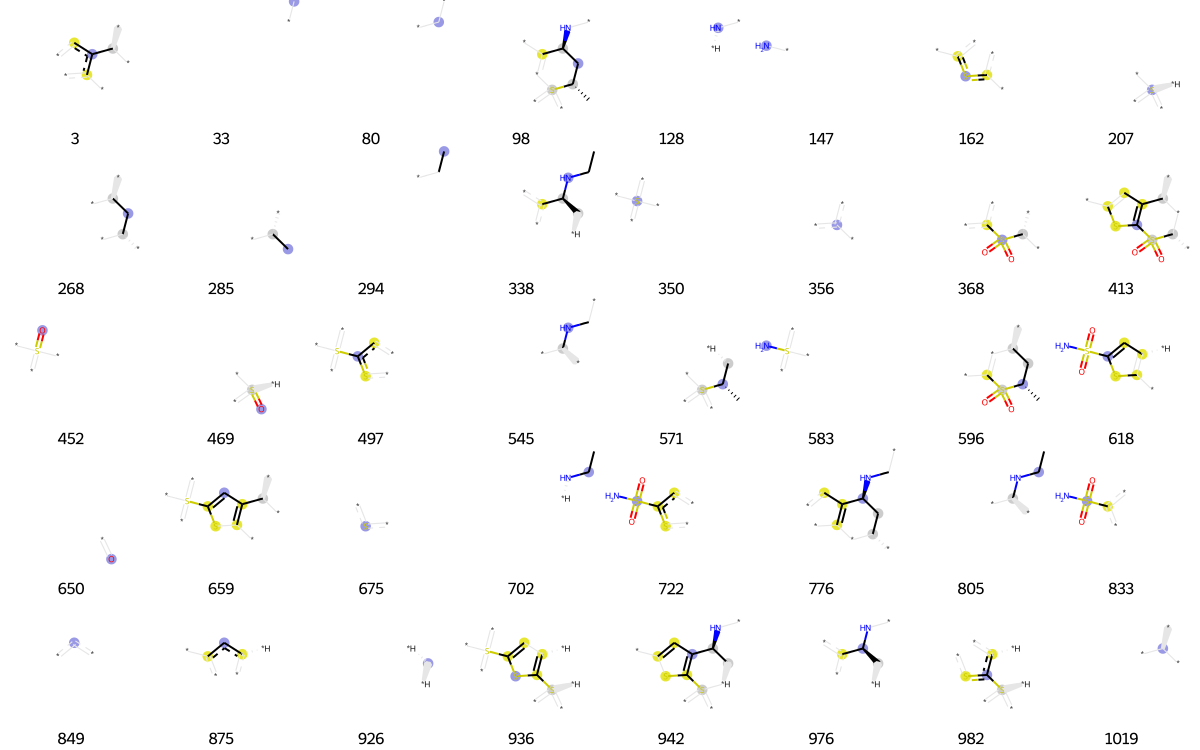

In [4547]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [4548]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 46,
 80,
 114,
 123,
 127,
 162,
 164,
 166,
 171,
 191,
 201,
 216,
 231,
 251,
 268,
 310,
 356,
 362,
 392,
 414,
 492,
 504,
 507,
 550,
 561,
 564,
 650,
 656,
 659,
 675,
 695,
 700,
 715,
 726,
 730,
 753,
 807,
 816,
 835,
 838,
 849,
 876,
 881,
 893,
 923,
 939,
 957]

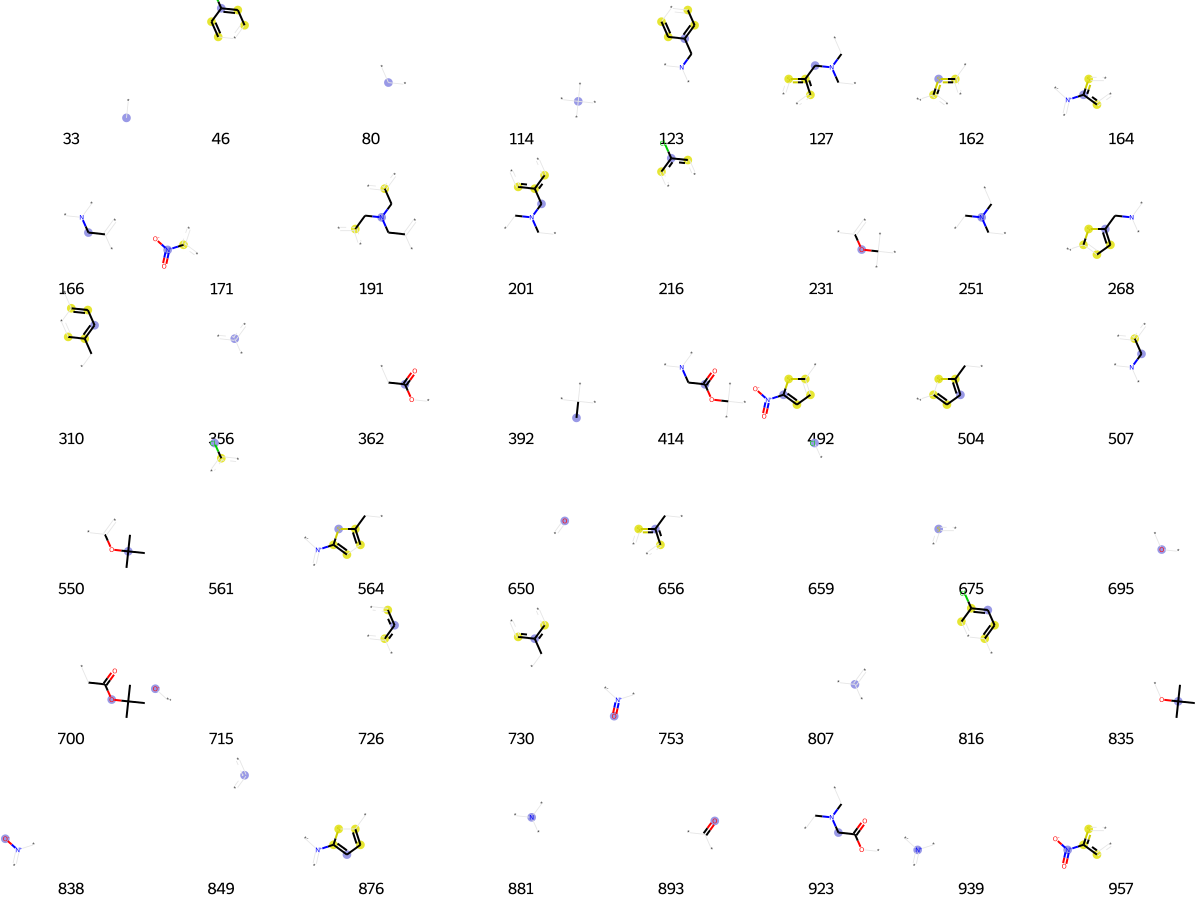

In [4549]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [4550]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 31,
 33,
 64,
 128,
 175,
 184,
 191,
 235,
 249,
 356,
 361,
 376,
 386,
 423,
 486,
 512,
 526,
 608,
 650,
 695,
 698,
 703,
 726,
 771,
 792,
 799,
 807,
 837,
 841,
 847,
 849,
 875,
 893,
 946,
 954,
 961,
 967,
 1013]

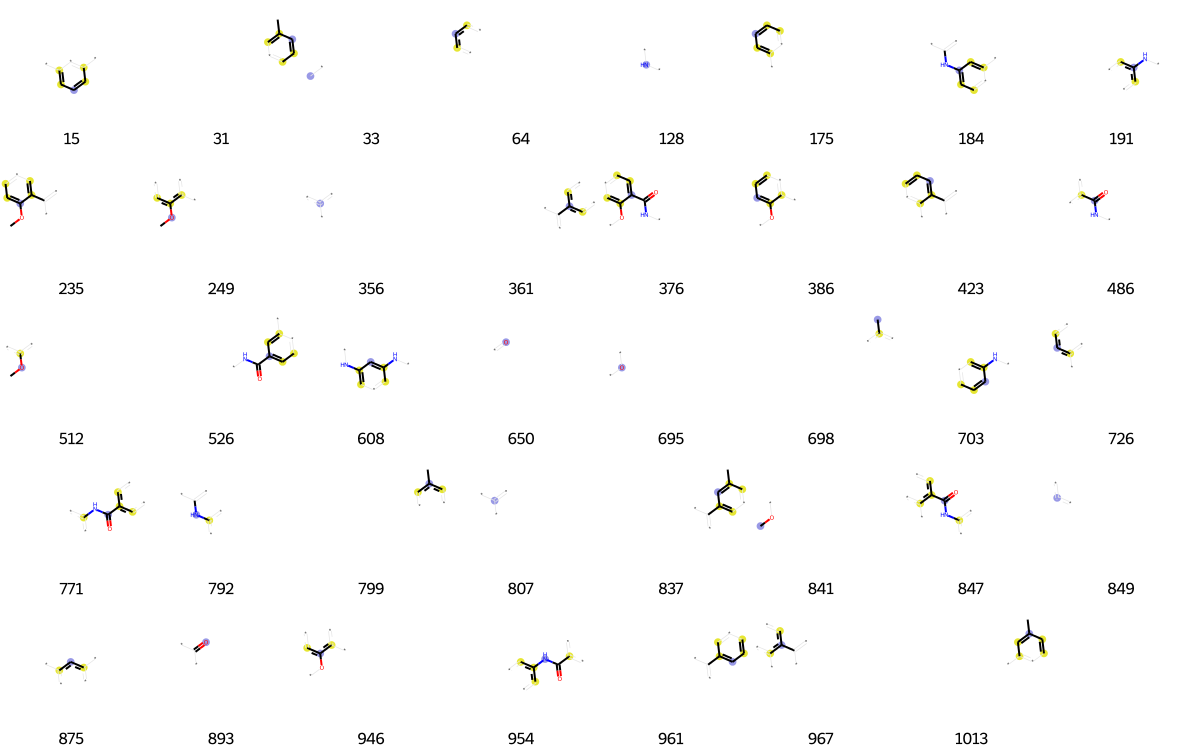

In [4551]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [4552]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 5,
 33,
 34,
 39,
 65,
 80,
 81,
 87,
 89,
 116,
 117,
 121,
 128,
 130,
 140,
 186,
 210,
 218,
 232,
 233,
 255,
 257,
 259,
 284,
 289,
 294,
 295,
 298,
 314,
 329,
 341,
 356,
 363,
 378,
 387,
 389,
 399,
 417,
 456,
 464,
 470,
 484,
 573,
 578,
 585,
 590,
 611,
 647,
 650,
 675,
 698,
 718,
 726,
 745,
 747,
 753,
 754,
 759,
 762,
 807,
 818,
 829,
 841,
 849,
 859,
 872,
 879,
 882,
 893,
 898,
 926,
 935,
 936,
 983,
 998,
 1017,
 1019]

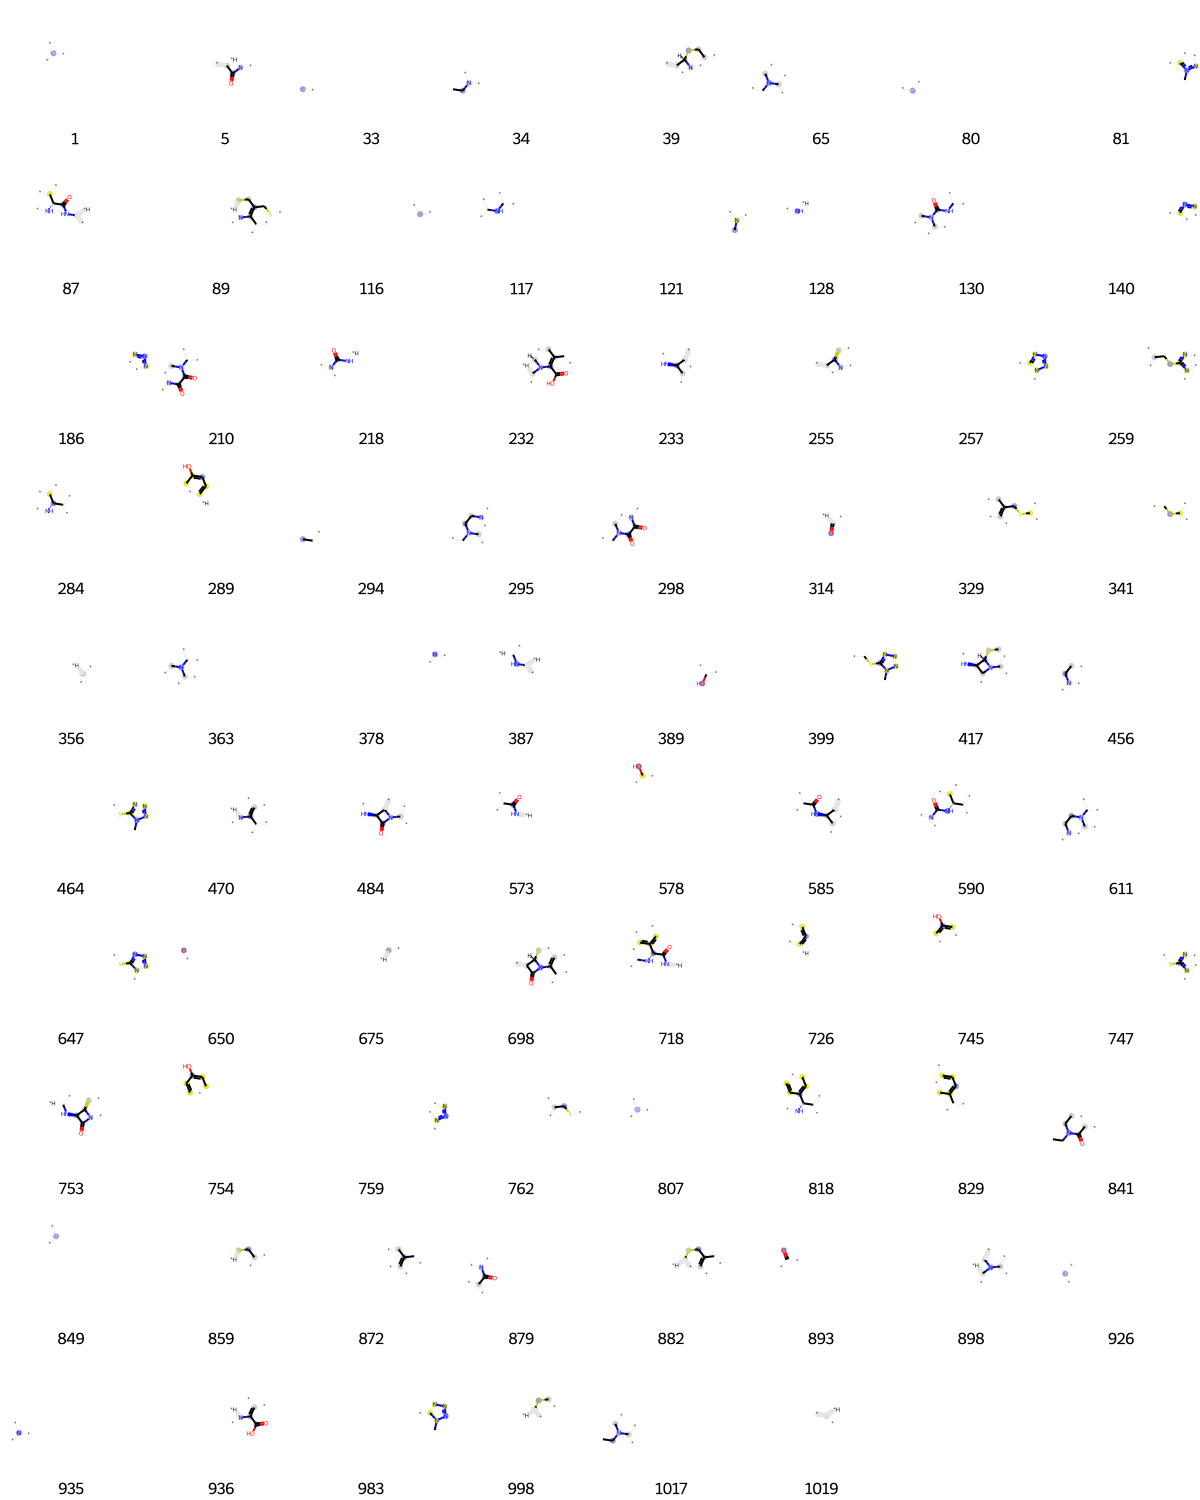

In [4553]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4554]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 39,
 45,
 54,
 64,
 72,
 96,
 121,
 139,
 175,
 197,
 202,
 261,
 267,
 288,
 314,
 333,
 356,
 389,
 392,
 504,
 549,
 564,
 578,
 586,
 622,
 650,
 682,
 702,
 726,
 807,
 849,
 864,
 881,
 893,
 896,
 935]

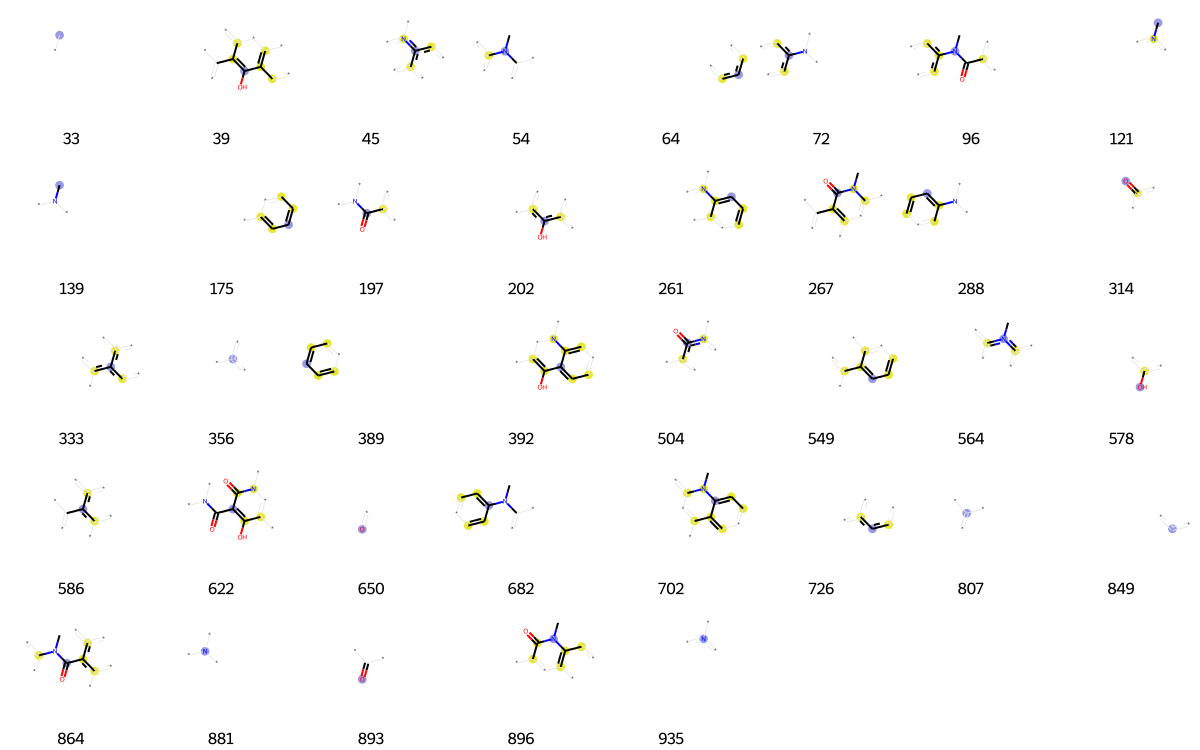

In [4555]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4556]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[13,
 20,
 33,
 36,
 53,
 73,
 80,
 90,
 94,
 121,
 128,
 138,
 141,
 184,
 191,
 221,
 249,
 310,
 331,
 333,
 336,
 356,
 378,
 381,
 386,
 412,
 417,
 428,
 456,
 458,
 494,
 512,
 518,
 523,
 576,
 593,
 613,
 624,
 646,
 647,
 650,
 653,
 654,
 656,
 673,
 688,
 695,
 699,
 726,
 747,
 764,
 767,
 780,
 787,
 792,
 807,
 816,
 825,
 841,
 842,
 843,
 849,
 875,
 887,
 893,
 904,
 921,
 926,
 935,
 946,
 950,
 1009]

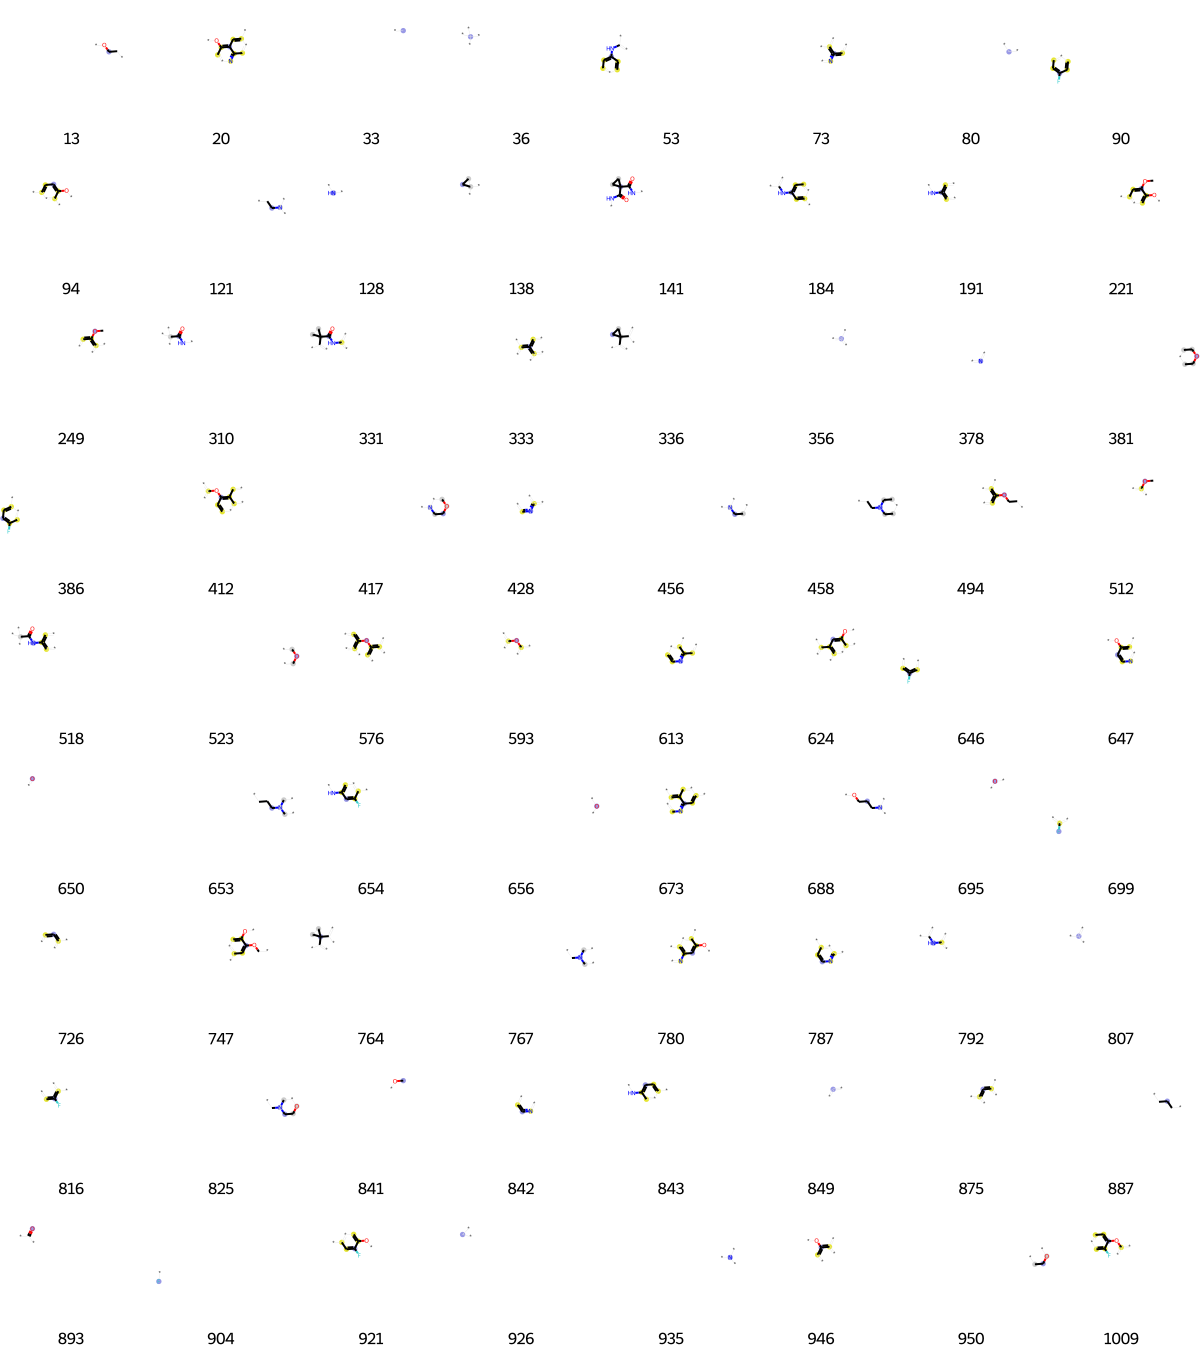

In [4557]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [4558]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[3,
 29,
 33,
 64,
 121,
 171,
 175,
 207,
 208,
 212,
 255,
 298,
 356,
 366,
 389,
 392,
 456,
 561,
 578,
 583,
 636,
 639,
 654,
 659,
 689,
 714,
 726,
 739,
 740,
 763,
 807,
 814,
 838,
 849,
 864,
 875,
 926,
 935,
 1019]

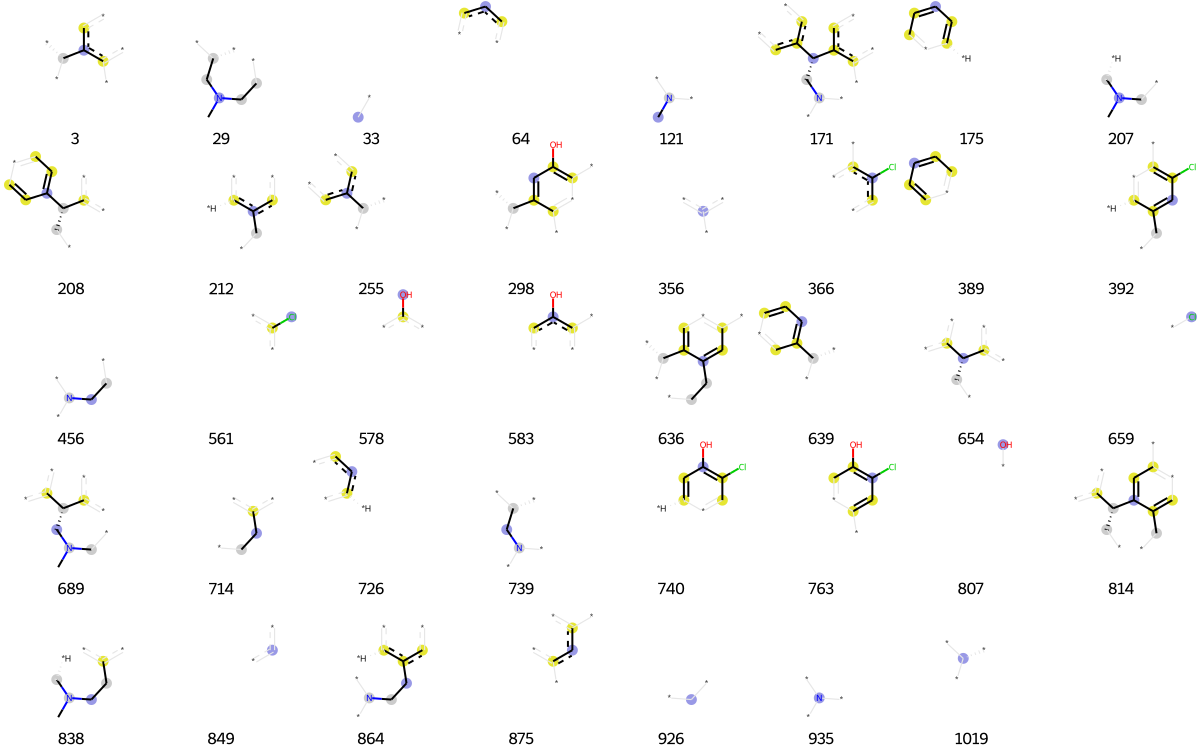

In [4559]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4560]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 3,
 5,
 33,
 41,
 64,
 70,
 80,
 117,
 121,
 128,
 143,
 175,
 225,
 271,
 273,
 283,
 314,
 322,
 325,
 352,
 356,
 371,
 387,
 405,
 447,
 516,
 525,
 573,
 623,
 646,
 650,
 684,
 699,
 706,
 720,
 726,
 730,
 767,
 804,
 805,
 807,
 849,
 875,
 886,
 893,
 904,
 935,
 984,
 987,
 989,
 1001,
 1019]

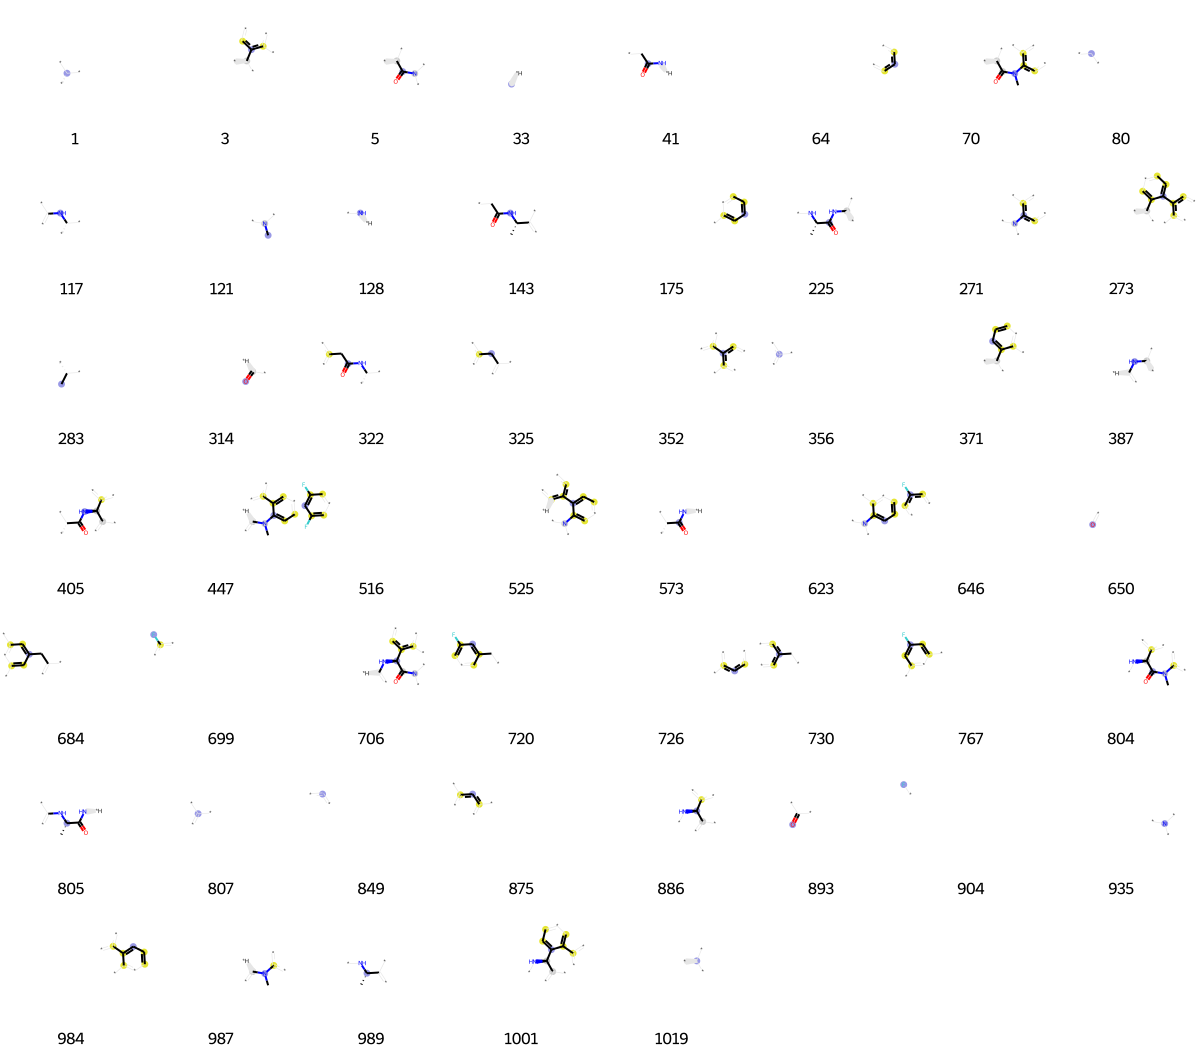

In [4561]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4562]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[15,
 33,
 54,
 64,
 73,
 114,
 119,
 121,
 128,
 184,
 191,
 200,
 279,
 314,
 319,
 329,
 333,
 342,
 356,
 360,
 361,
 367,
 378,
 385,
 392,
 393,
 428,
 433,
 486,
 491,
 493,
 504,
 526,
 541,
 629,
 645,
 650,
 658,
 667,
 674,
 698,
 726,
 732,
 771,
 790,
 792,
 807,
 819,
 843,
 849,
 875,
 893,
 922,
 932,
 935,
 954,
 961,
 993,
 1000,
 1015]

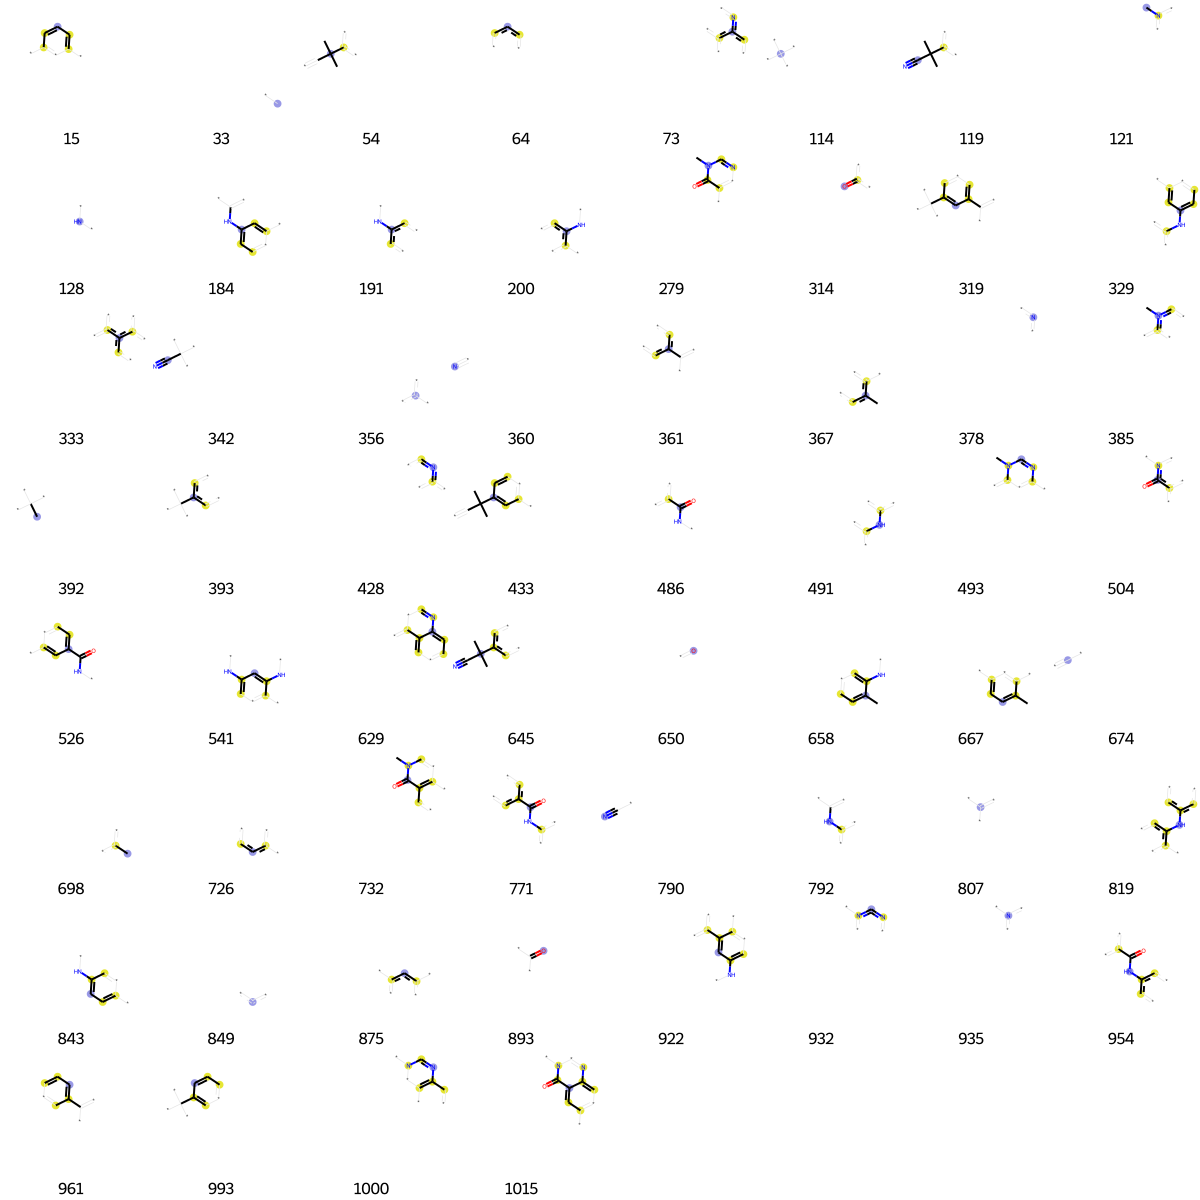

In [4563]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [4564]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[31,
 147,
 150,
 165,
 216,
 285,
 332,
 352,
 356,
 361,
 366,
 378,
 389,
 409,
 433,
 508,
 561,
 568,
 616,
 650,
 659,
 666,
 670,
 694,
 726,
 807,
 816,
 831,
 843,
 849,
 875,
 893,
 976]

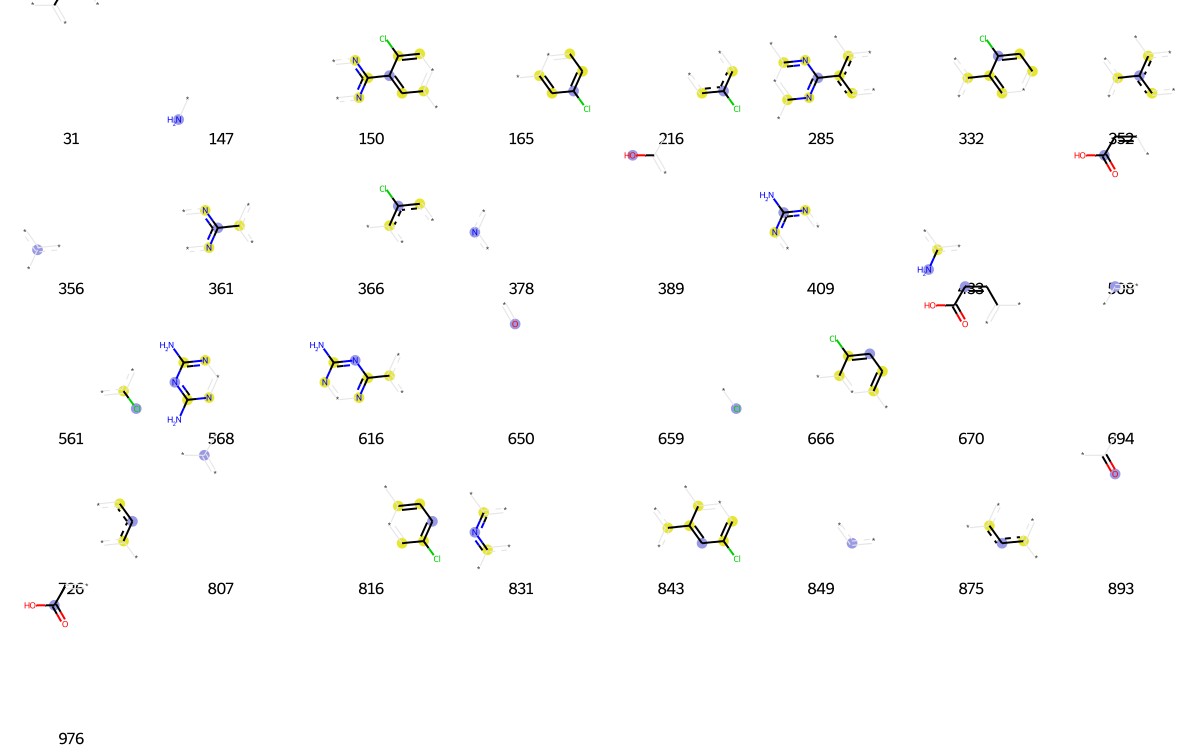

In [4565]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4566]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[5,
 10,
 13,
 14,
 15,
 32,
 64,
 70,
 80,
 102,
 107,
 114,
 175,
 241,
 301,
 322,
 356,
 372,
 383,
 389,
 392,
 426,
 428,
 431,
 447,
 451,
 543,
 562,
 575,
 577,
 585,
 609,
 650,
 653,
 675,
 695,
 706,
 726,
 761,
 780,
 798,
 807,
 849,
 862,
 884,
 887,
 893,
 926,
 931,
 941,
 947,
 1019]

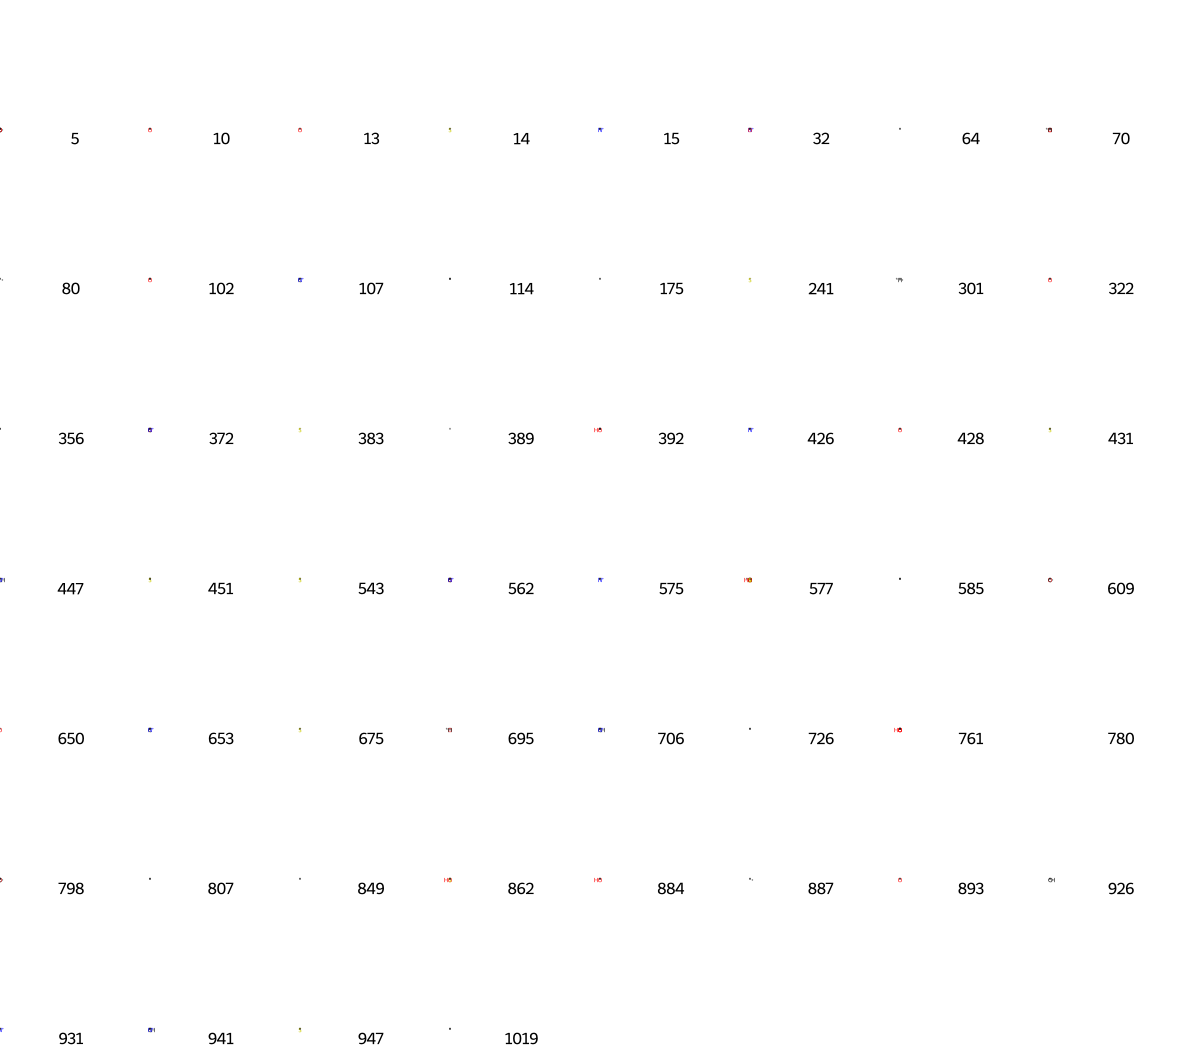

In [4567]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4568]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 92,
 94,
 114,
 128,
 136,
 162,
 191,
 246,
 249,
 259,
 270,
 289,
 302,
 317,
 320,
 350,
 356,
 378,
 385,
 392,
 452,
 502,
 503,
 512,
 558,
 578,
 620,
 650,
 661,
 675,
 695,
 698,
 726,
 743,
 745,
 754,
 775,
 792,
 807,
 831,
 841,
 843,
 849,
 866,
 875,
 893,
 896,
 929,
 938,
 946,
 999,
 1005,
 1006]

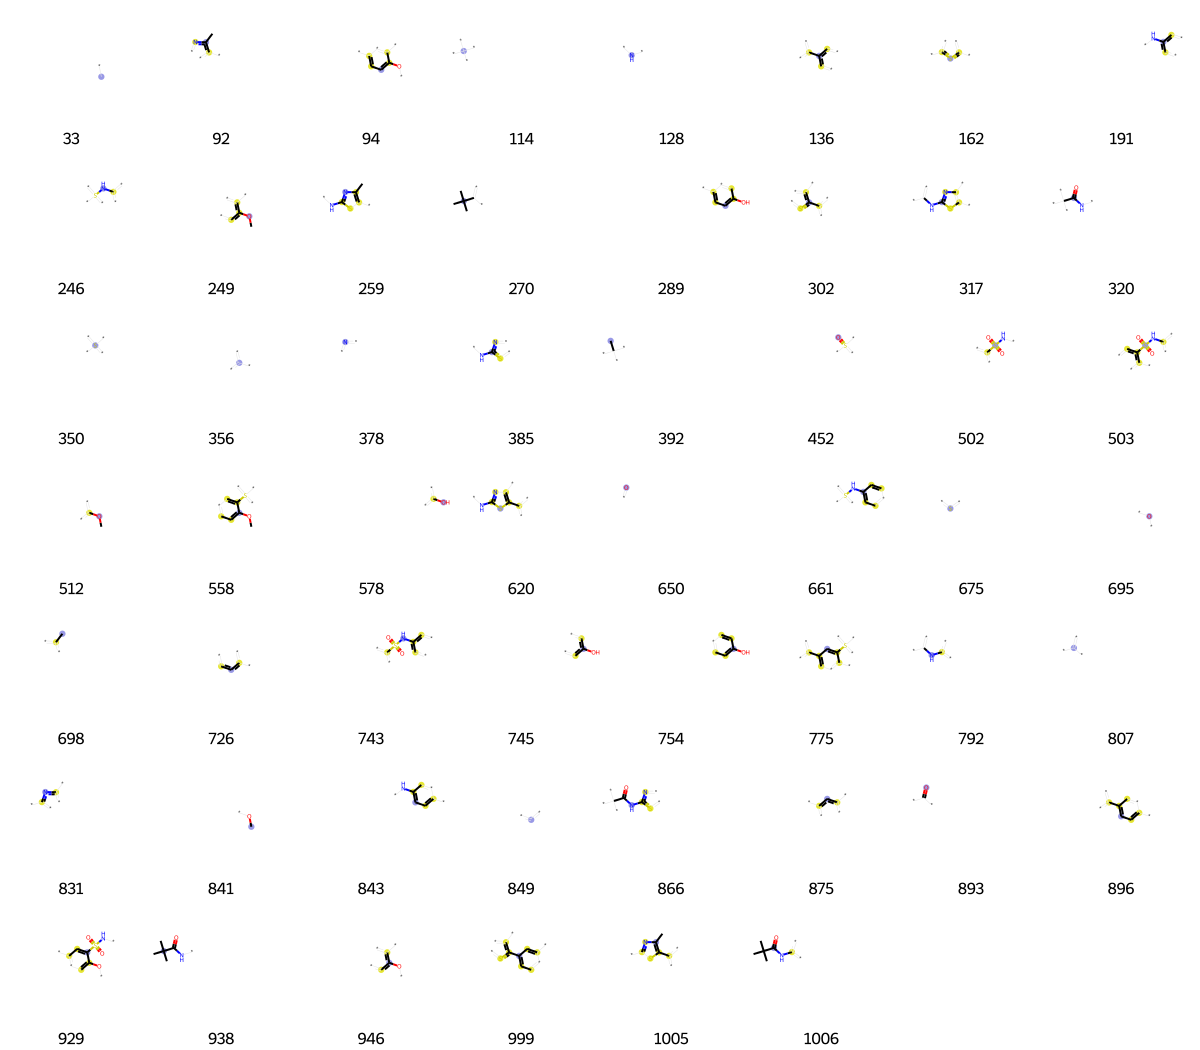

In [4569]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4570]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[2,
 4,
 22,
 39,
 125,
 197,
 248,
 270,
 281,
 301,
 356,
 378,
 380,
 518,
 552,
 604,
 650,
 656,
 807,
 809,
 849,
 855,
 875,
 881,
 890,
 893,
 926,
 931,
 932,
 976,
 1012,
 1019]

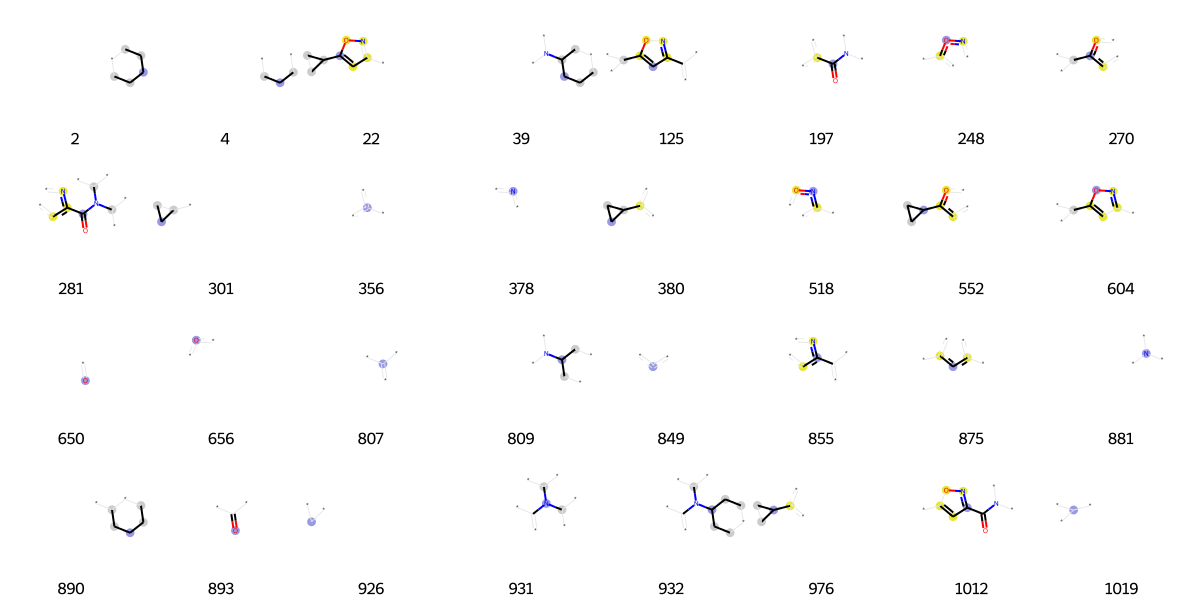

In [4571]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4572]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[10,
 13,
 33,
 37,
 64,
 80,
 102,
 106,
 113,
 114,
 172,
 175,
 232,
 250,
 251,
 268,
 271,
 294,
 322,
 356,
 361,
 389,
 390,
 428,
 540,
 620,
 650,
 659,
 673,
 695,
 713,
 718,
 726,
 804,
 807,
 815,
 849,
 852,
 880,
 881,
 884,
 893,
 927,
 932,
 953,
 957,
 961,
 970]

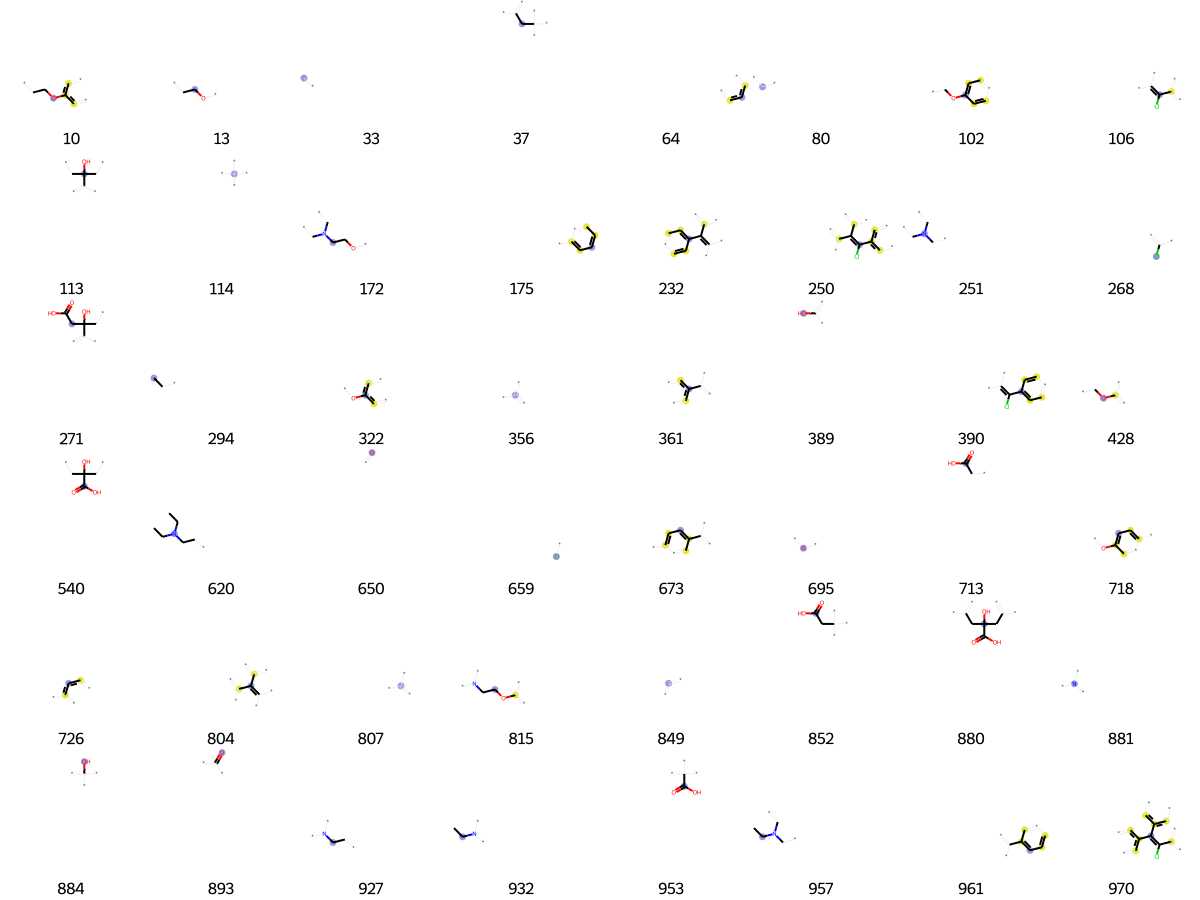

In [4573]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [4574]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[36,
 64,
 90,
 128,
 155,
 164,
 171,
 175,
 191,
 314,
 329,
 352,
 354,
 356,
 366,
 378,
 451,
 464,
 491,
 557,
 561,
 570,
 578,
 583,
 596,
 633,
 650,
 659,
 715,
 716,
 717,
 723,
 726,
 753,
 763,
 807,
 834,
 838,
 843,
 849,
 870,
 872,
 875,
 939,
 984]

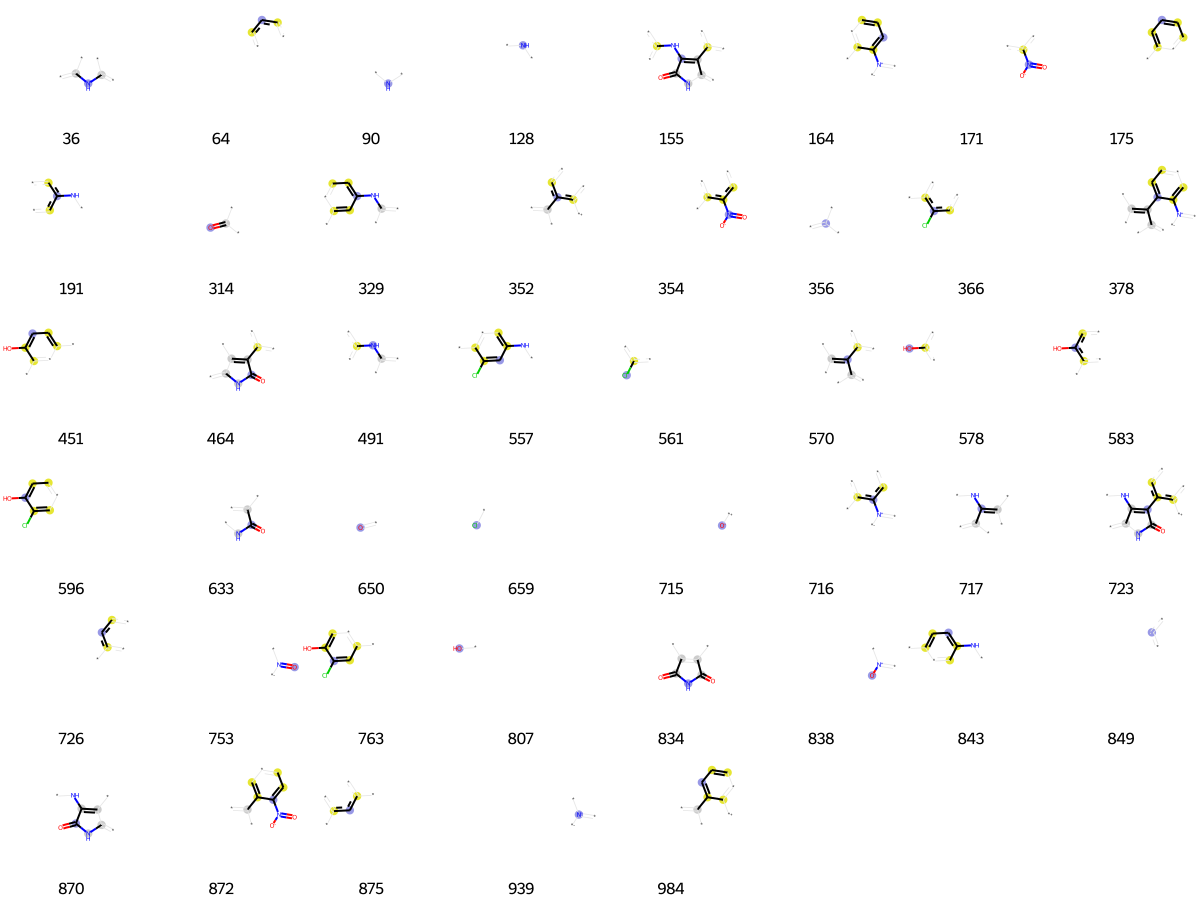

In [4575]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4576]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 33,
 34,
 36,
 92,
 121,
 138,
 212,
 231,
 284,
 301,
 322,
 356,
 413,
 456,
 486,
 512,
 519,
 562,
 580,
 614,
 663,
 665,
 695,
 707,
 718,
 726,
 734,
 742,
 744,
 777,
 781,
 841,
 849,
 875,
 878,
 890,
 926,
 935,
 940,
 948,
 956,
 1019]

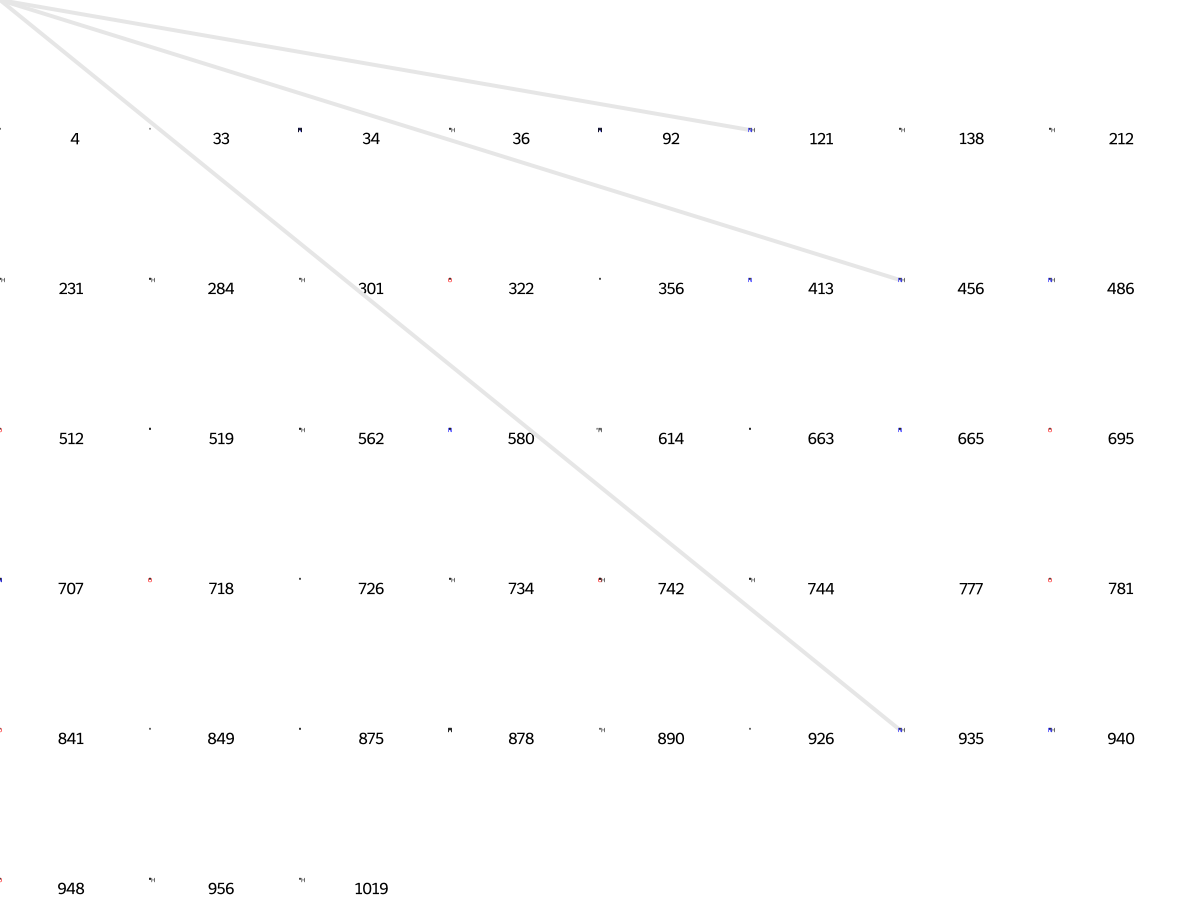

In [4577]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4578]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 15,
 56,
 64,
 80,
 90,
 94,
 128,
 184,
 191,
 218,
 219,
 329,
 342,
 356,
 357,
 369,
 375,
 378,
 392,
 415,
 428,
 444,
 456,
 458,
 491,
 511,
 544,
 558,
 562,
 579,
 607,
 608,
 637,
 650,
 667,
 669,
 677,
 703,
 708,
 713,
 726,
 728,
 768,
 792,
 806,
 807,
 824,
 831,
 833,
 849,
 867,
 875,
 892,
 893,
 918,
 926,
 935,
 973,
 974,
 985]

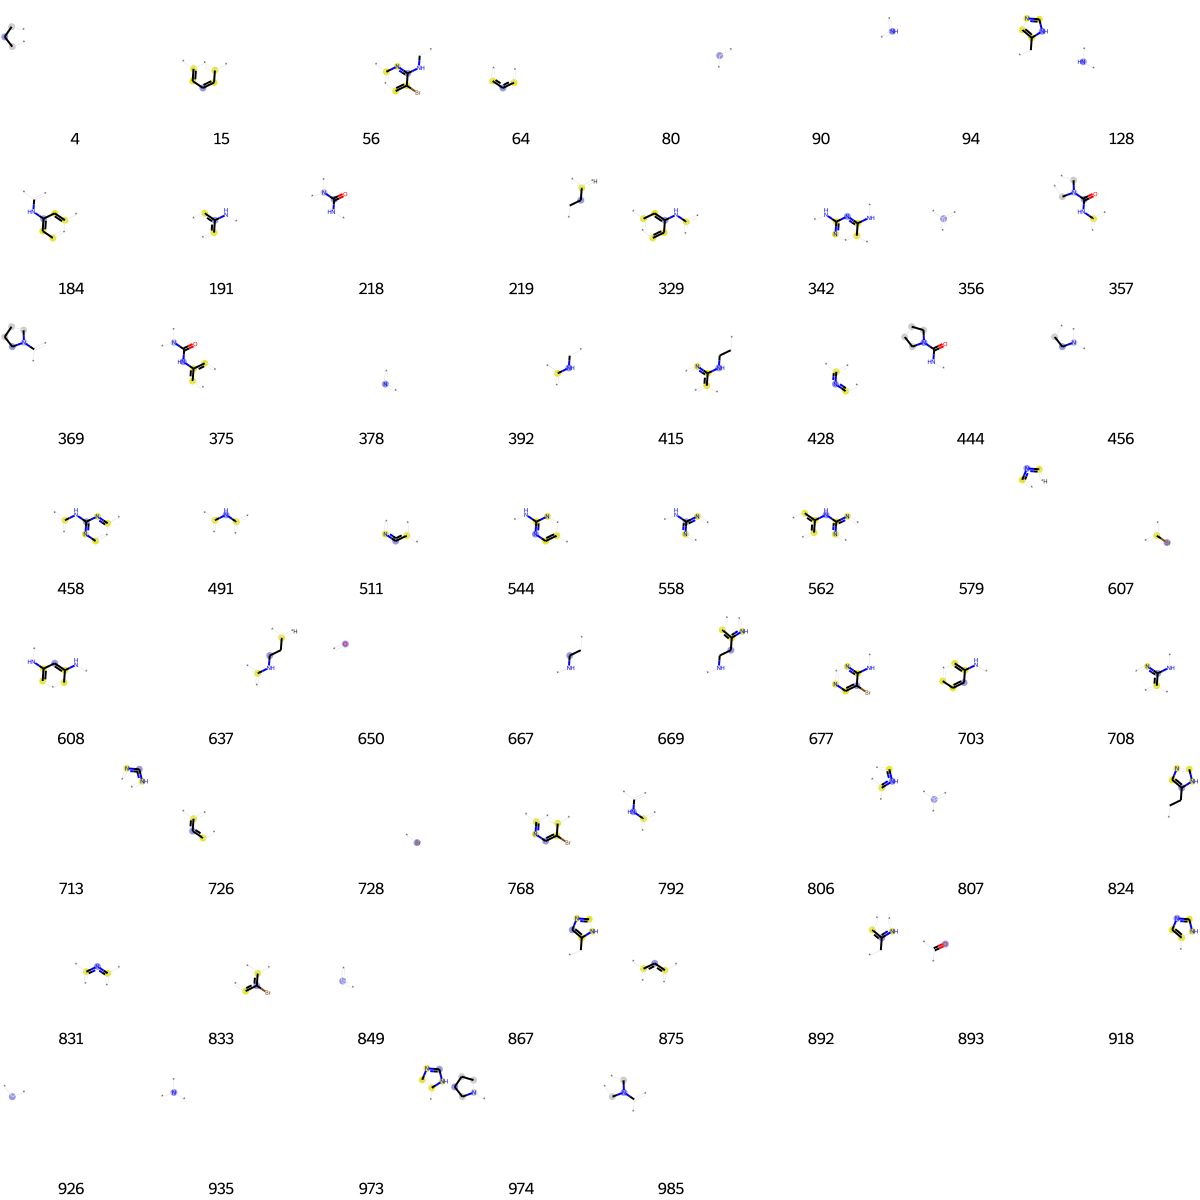

In [4579]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4580]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 46,
 114,
 175,
 216,
 341,
 356,
 561,
 600,
 659,
 726,
 752,
 777,
 803,
 816,
 829,
 849,
 940]

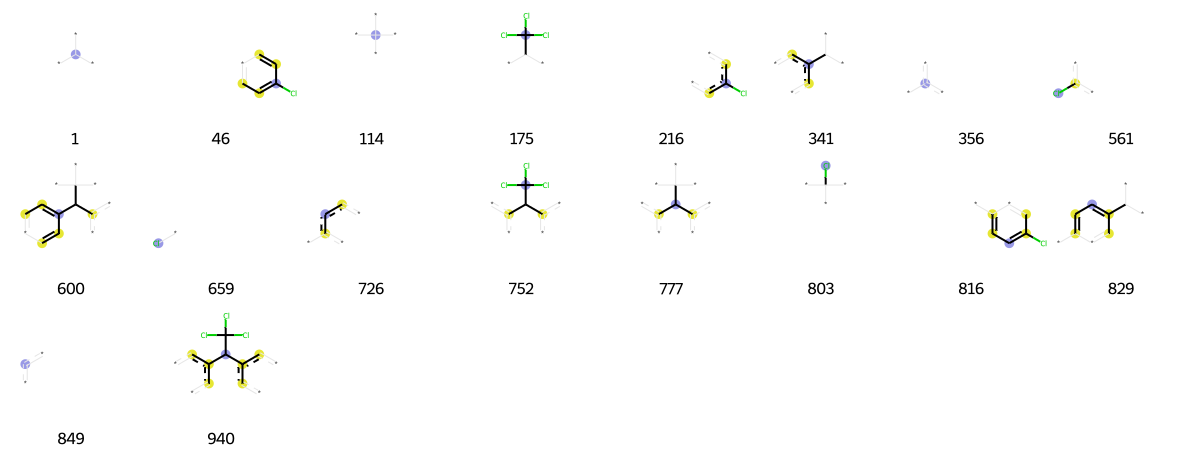

In [4581]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4582]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[4,
 33,
 36,
 80,
 139,
 214,
 301,
 310,
 325,
 356,
 364,
 366,
 378,
 456,
 463,
 500,
 514,
 530,
 560,
 561,
 650,
 651,
 659,
 665,
 666,
 685,
 726,
 730,
 780,
 798,
 807,
 830,
 849,
 875,
 881,
 885,
 890,
 893,
 926,
 935,
 950,
 974,
 1019]

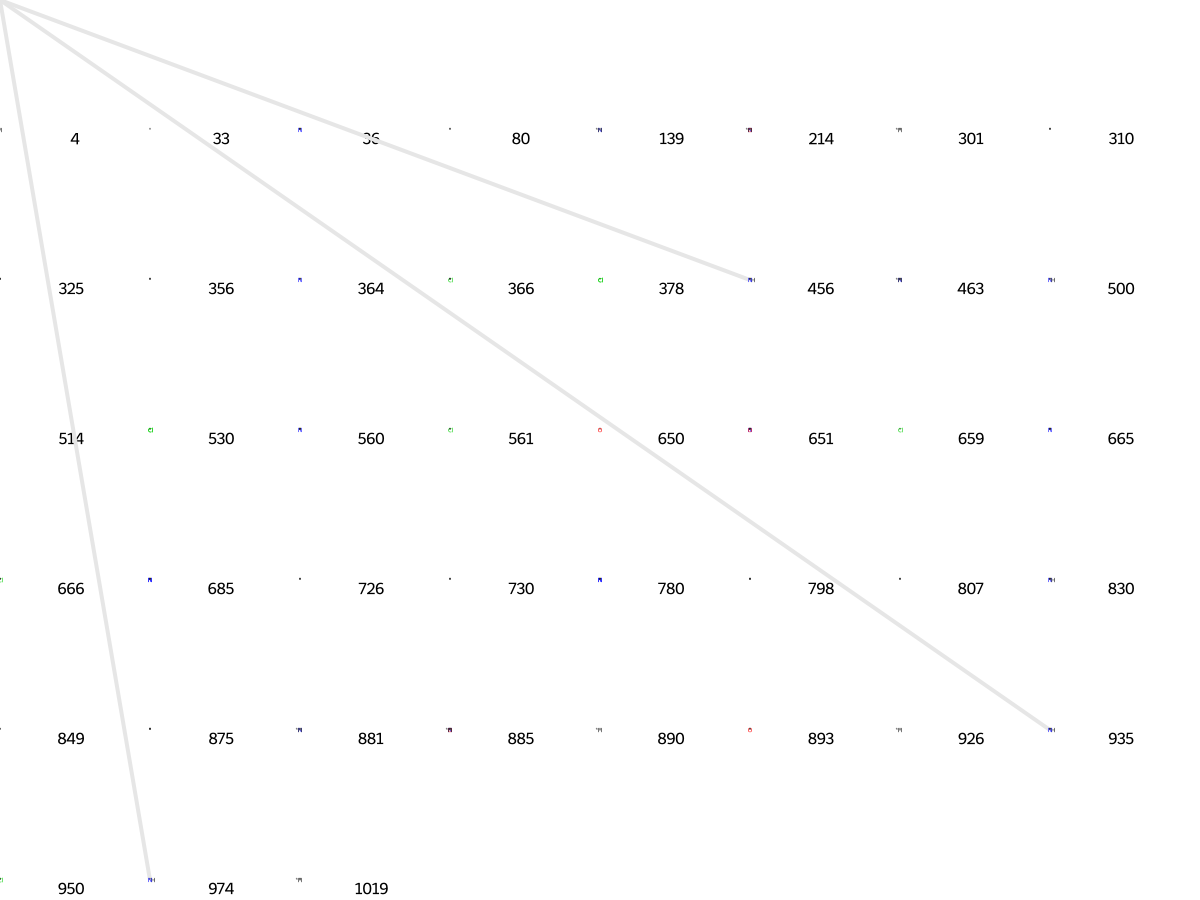

In [4583]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4584]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 12,
 15,
 25,
 34,
 64,
 74,
 78,
 80,
 102,
 112,
 165,
 203,
 216,
 305,
 310,
 314,
 356,
 360,
 378,
 391,
 431,
 433,
 449,
 455,
 456,
 499,
 511,
 514,
 526,
 542,
 561,
 579,
 592,
 617,
 650,
 659,
 674,
 710,
 726,
 730,
 741,
 767,
 790,
 798,
 801,
 811,
 849,
 875,
 922,
 926,
 930,
 932,
 935,
 952]

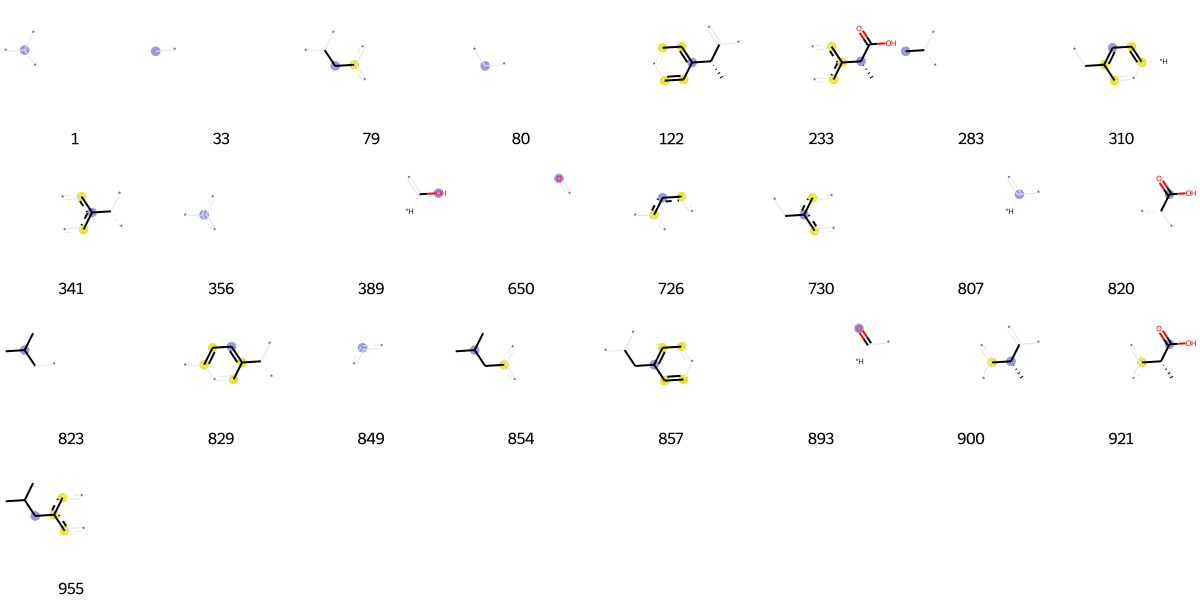

In [4585]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4586]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[17,
 33,
 36,
 138,
 173,
 184,
 202,
 236,
 250,
 252,
 258,
 270,
 317,
 356,
 361,
 389,
 489,
 543,
 578,
 624,
 650,
 656,
 672,
 698,
 700,
 714,
 764,
 807,
 856,
 893,
 926]

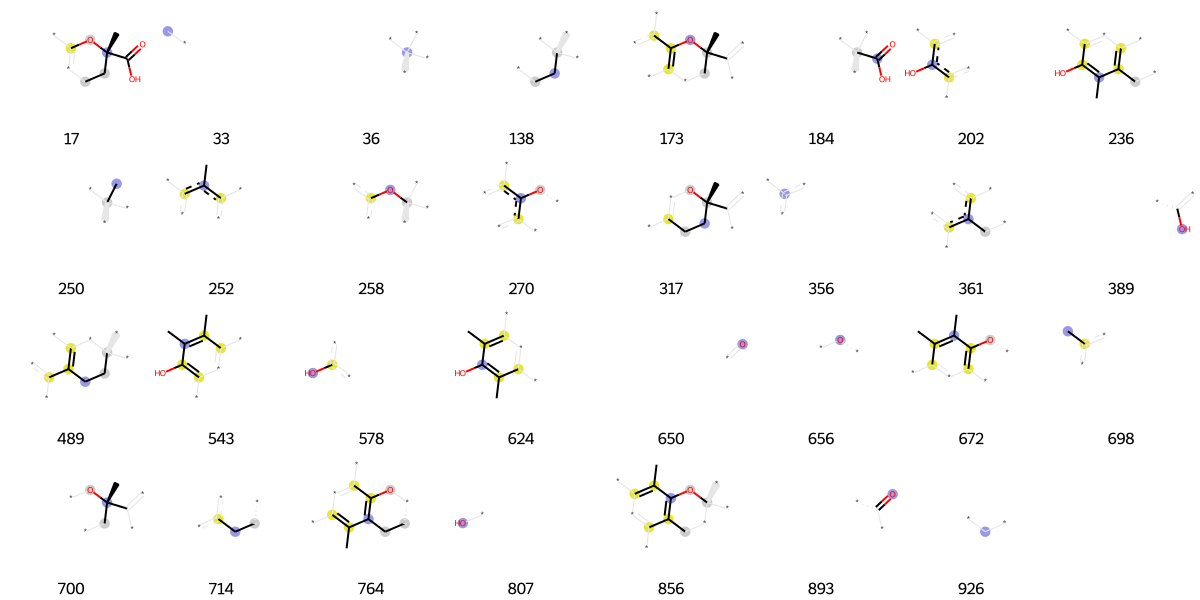

In [4587]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4588]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 10,
 63,
 64,
 90,
 128,
 162,
 175,
 200,
 218,
 250,
 272,
 278,
 300,
 301,
 305,
 314,
 315,
 325,
 327,
 356,
 387,
 419,
 423,
 461,
 486,
 556,
 650,
 672,
 675,
 690,
 722,
 726,
 745,
 792,
 807,
 831,
 842,
 849,
 875,
 885,
 890,
 893,
 926,
 944,
 947,
 967,
 976,
 1019,
 1020,
 1022]

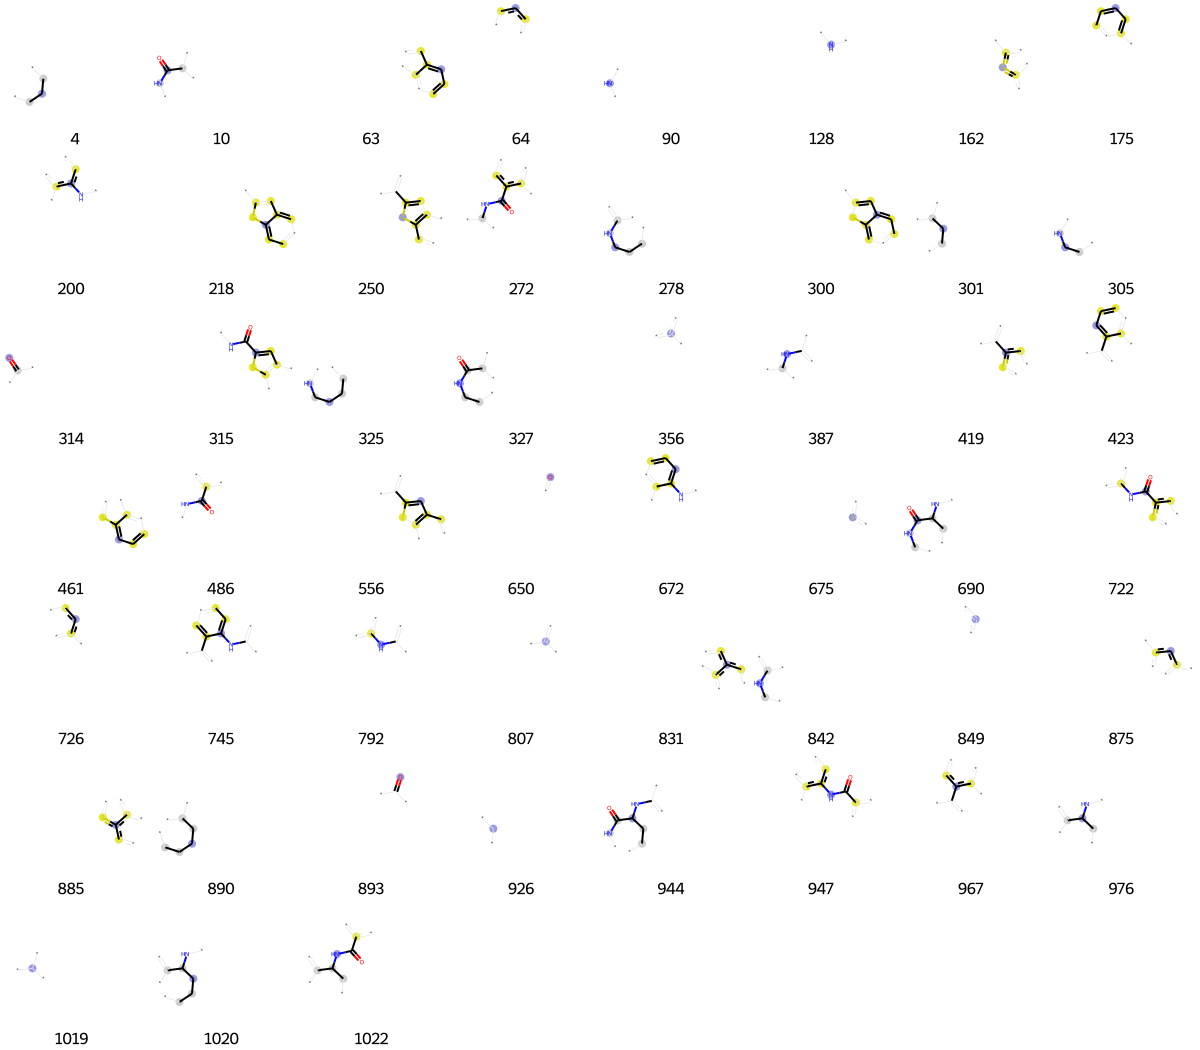

In [4589]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4590]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 33,
 46,
 88,
 128,
 129,
 160,
 200,
 202,
 216,
 237,
 278,
 341,
 345,
 356,
 360,
 366,
 367,
 418,
 486,
 506,
 533,
 561,
 568,
 570,
 578,
 582,
 609,
 628,
 650,
 659,
 661,
 674,
 698,
 726,
 774,
 790,
 792,
 807,
 816,
 829,
 836,
 847,
 849,
 875,
 876,
 893,
 925,
 947,
 967,
 1019]

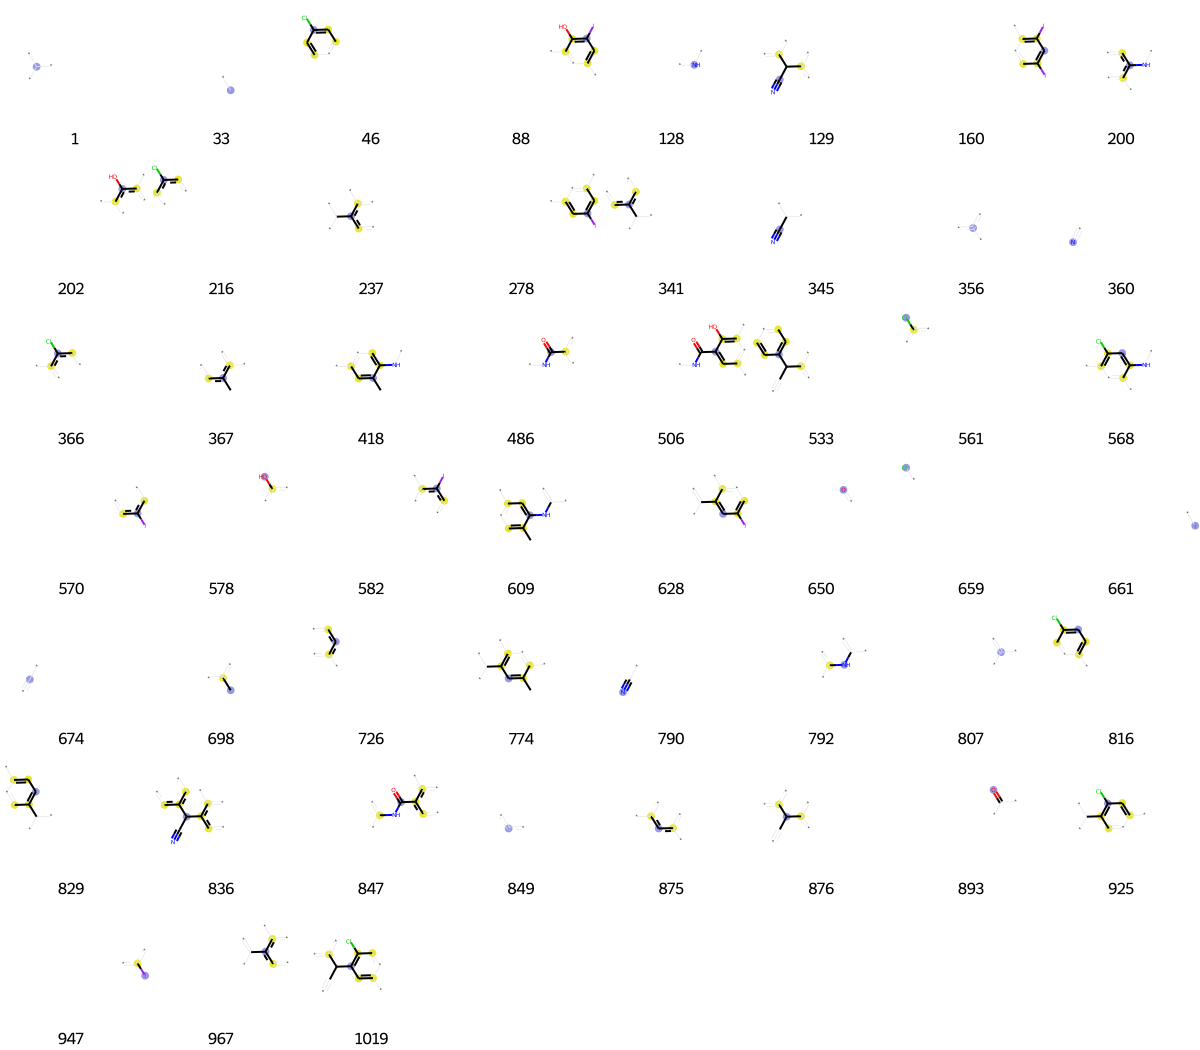

In [4591]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4592]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[7,
 11,
 16,
 33,
 36,
 61,
 102,
 119,
 121,
 138,
 161,
 231,
 239,
 245,
 250,
 301,
 302,
 314,
 356,
 377,
 504,
 519,
 521,
 529,
 598,
 622,
 650,
 694,
 695,
 696,
 714,
 757,
 758,
 767,
 807,
 831,
 849,
 854,
 860,
 893,
 926,
 1017,
 1019]

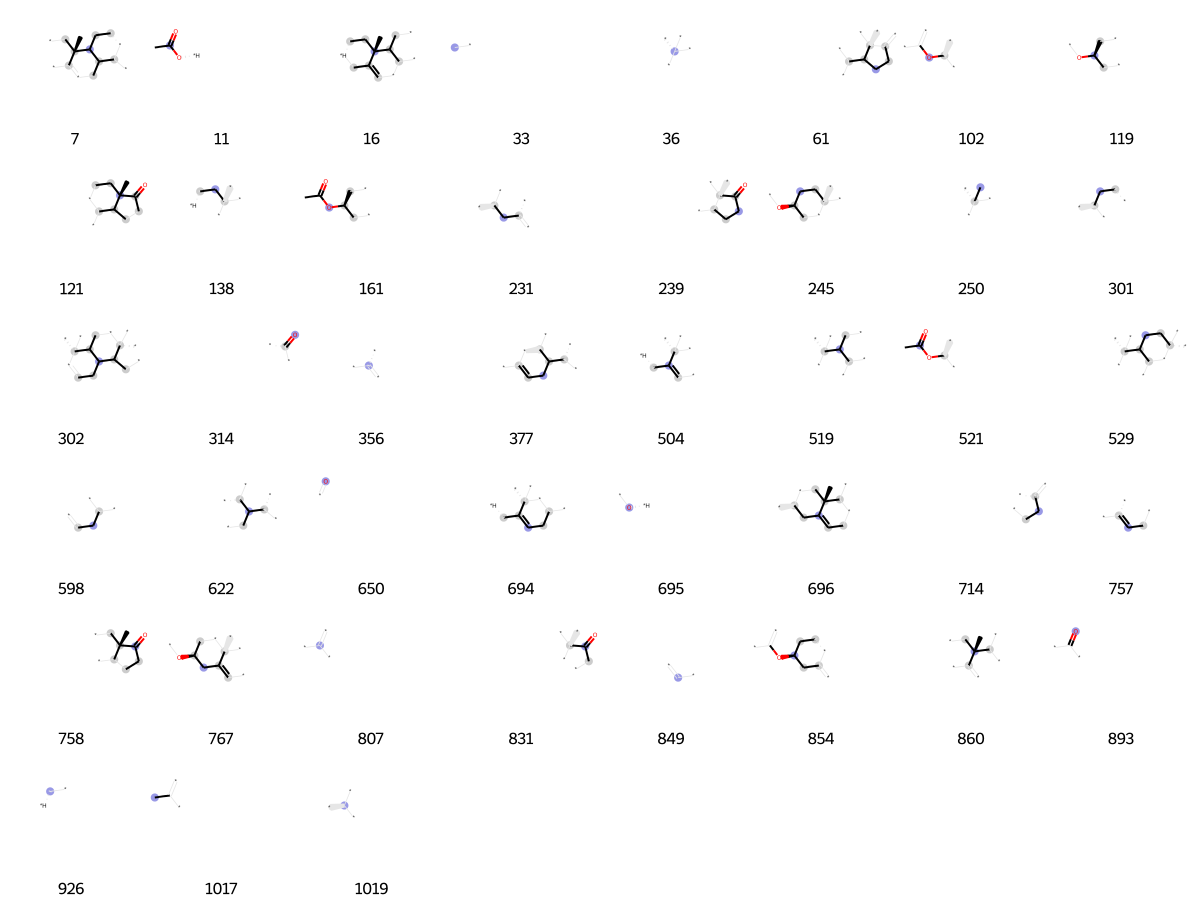

In [4593]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4594]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 79,
 80,
 147,
 197,
 289,
 310,
 356,
 389,
 403,
 578,
 650,
 726,
 730,
 745,
 754,
 786,
 807,
 820,
 825,
 849,
 857,
 893,
 1017]

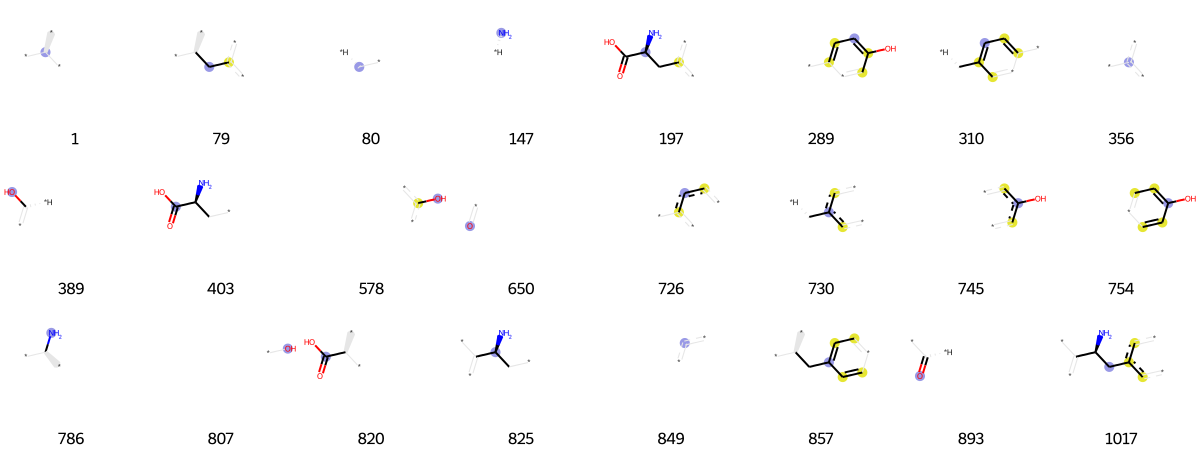

In [4595]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4596]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[7,
 33,
 36,
 52,
 64,
 90,
 249,
 257,
 267,
 285,
 352,
 356,
 361,
 362,
 378,
 394,
 478,
 482,
 492,
 512,
 539,
 547,
 585,
 640,
 680,
 695,
 715,
 726,
 742,
 771,
 806,
 827,
 831,
 841,
 849,
 875,
 904,
 941,
 946,
 980,
 995]

In [4597]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[13,
 23,
 33,
 43,
 77,
 96,
 146,
 162,
 233,
 285,
 301,
 308,
 314,
 333,
 335,
 356,
 360,
 361,
 389,
 407,
 416,
 453,
 456,
 458,
 464,
 525,
 577,
 590,
 624,
 650,
 699,
 705,
 714,
 734,
 806,
 807,
 816,
 825,
 844,
 849,
 875,
 892,
 893,
 904,
 926,
 935,
 944,
 967,
 1019]

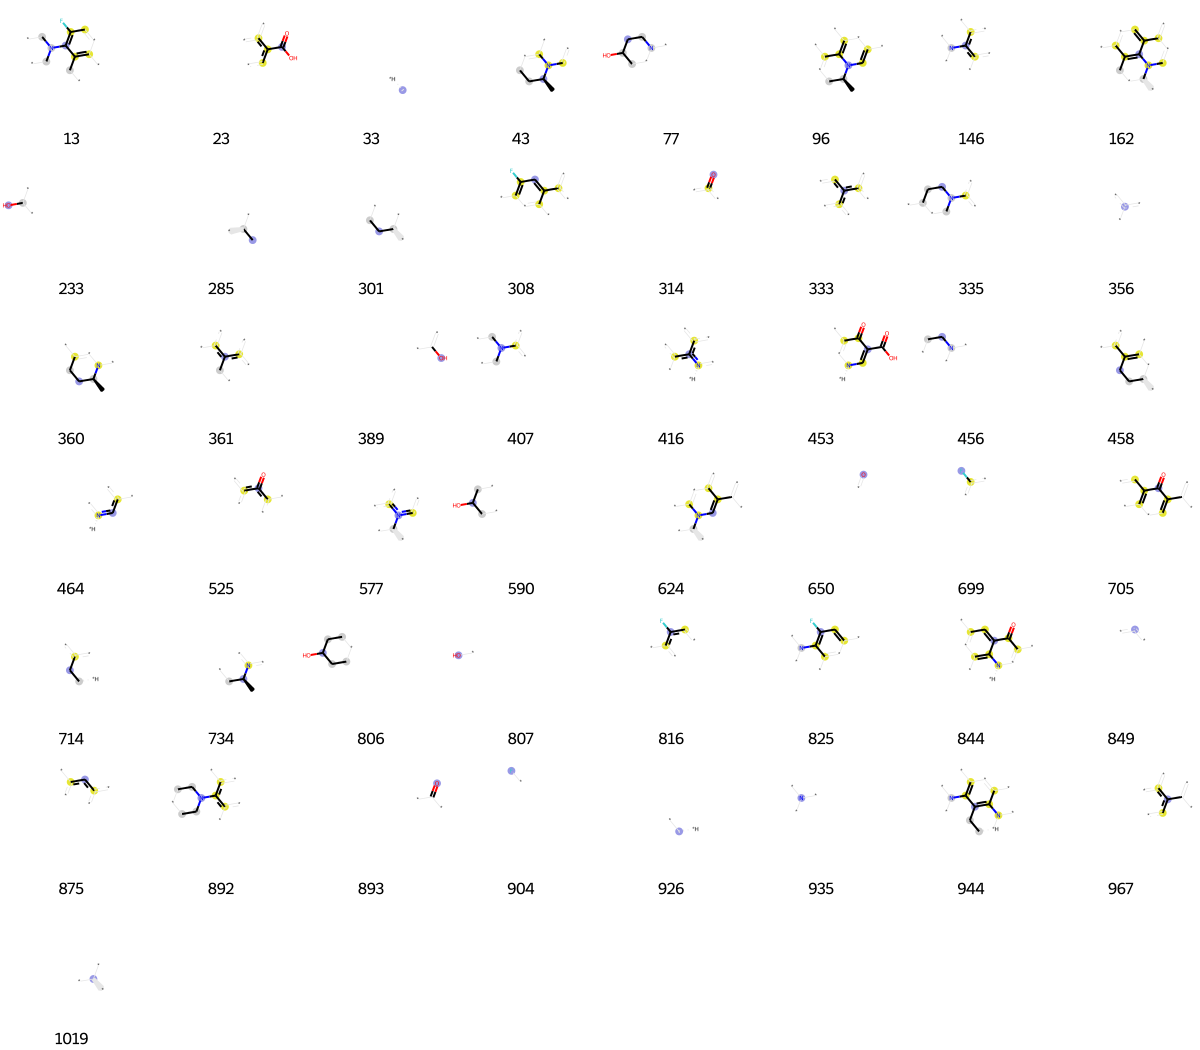

In [4598]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [4599]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 33,
 64,
 75,
 80,
 104,
 119,
 175,
 202,
 238,
 266,
 305,
 314,
 333,
 341,
 356,
 367,
 368,
 389,
 444,
 475,
 512,
 526,
 549,
 557,
 578,
 580,
 602,
 650,
 656,
 726,
 784,
 807,
 849,
 893,
 971,
 1017]

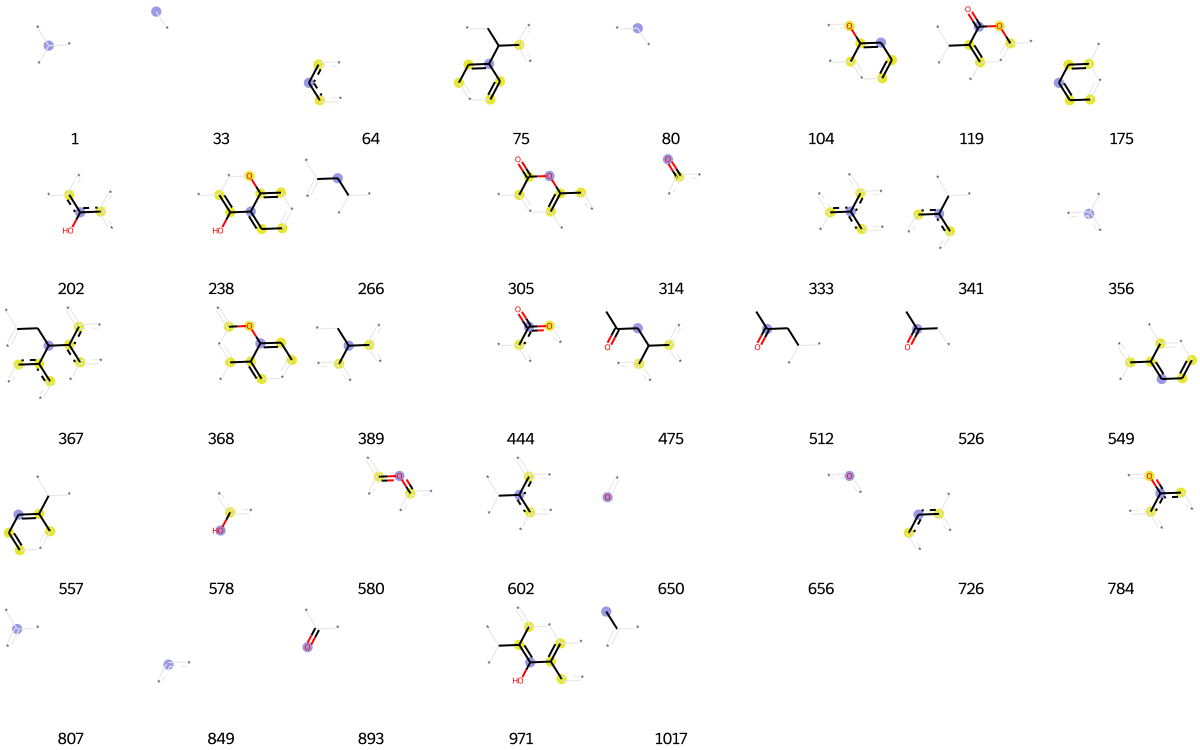

In [4600]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4601]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 4,
 33,
 72,
 80,
 89,
 128,
 137,
 220,
 227,
 283,
 294,
 315,
 341,
 350,
 356,
 375,
 441,
 451,
 452,
 520,
 578,
 583,
 589,
 592,
 650,
 692,
 726,
 749,
 760,
 807,
 824,
 829,
 849,
 875,
 979]

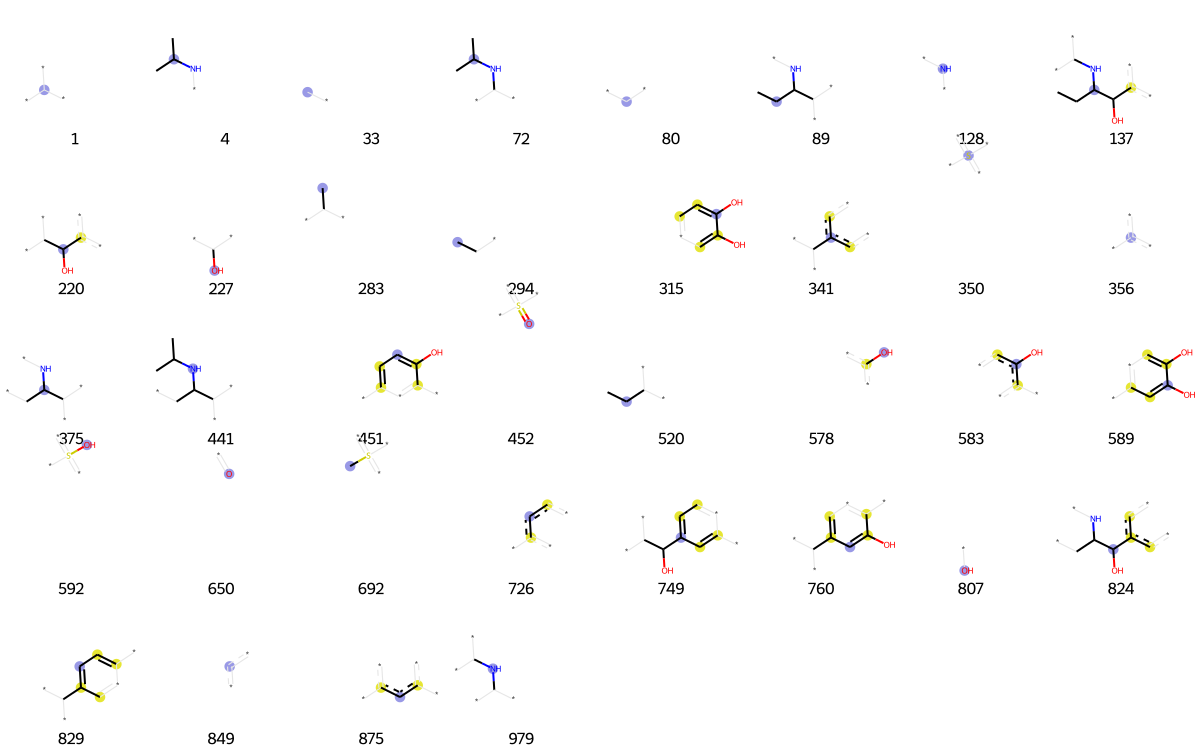

In [4602]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [4603]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 36,
 51,
 80,
 84,
 88,
 122,
 129,
 138,
 155,
 182,
 188,
 195,
 222,
 233,
 242,
 250,
 262,
 294,
 301,
 314,
 356,
 362,
 375,
 408,
 412,
 465,
 470,
 479,
 504,
 507,
 519,
 529,
 540,
 588,
 591,
 622,
 640,
 650,
 679,
 695,
 714,
 718,
 769,
 773,
 794,
 807,
 841,
 849,
 860,
 887,
 893,
 897,
 914,
 926,
 973,
 990,
 1009,
 1019]

In [4604]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 42,
 46,
 64,
 79,
 80,
 139,
 175,
 283,
 293,
 294,
 356,
 389,
 438,
 514,
 550,
 583,
 589,
 674,
 726,
 729,
 730,
 773,
 849,
 857,
 881,
 915,
 974]

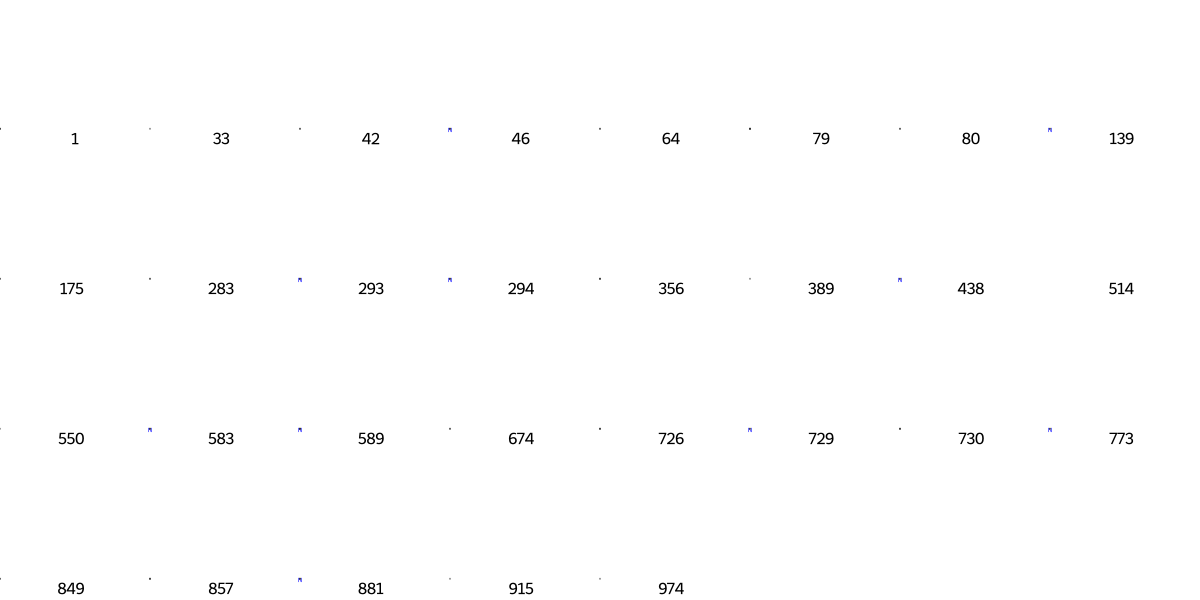

In [4605]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])